# 5291 project milestone

***mz2840***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import warnings
warnings.filterwarnings("ignore")

In [2]:
DOWNLOAD_MNIST = True
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True , # this is training data
    #transform=torchvision.transforms.ToTensor (),
    download=DOWNLOAD_MNIST ,
    )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [ ]:
test_data = torchvision.datasets.MNIST(root='./ mnist/', train=False,download=DOWNLOAD_MNIST,)

In [ ]:
# change the features to numpy
X_train = train_data.train_data.numpy()
X_test = test_data.test_data.numpy ()

In [ ]:
# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy ()

In [ ]:
len(X_train)

60000

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
len(X_test)

10000

#**Data Processing**

1. Familiarize yourself with the data, including

(a) Plot one sample in X train. What is the number you see from the 28 ×28 pixel-field? Does it match with the label in Y train?

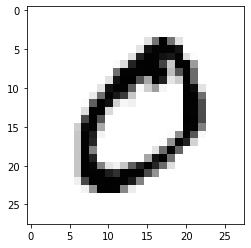

In [ ]:
plt.imshow(X_train[1], cmap="Greys")

In [ ]:
Y_train[1]

0

From the plot generated by "plt.imshow", we can see from the 28*28 pixel-field, the first number in X_train is 0. When we extract the corresponding y label, the label is 0. The plot matches with the label in Y train.

(b) What is the dimension of X train and X test? Normalize X train and X test such that the value of each element lies in [0,1].

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
X_train_scaled = []
for i in range(len(X_train)):
    X_train_scaled.append(normalize(X_train[i]))
X_train_scaled = np.array(X_train_scaled)

In [ ]:
X_test_scaled = []
for i in range(len(X_test)):
    X_test_scaled.append(normalize(X_test[i]))
X_test_scaled = np.array(X_test_scaled)

The dimension of X train is (60000, 28, 28), and the dimension of X test is (10000, 28, 28).X_train_scaled and X_test_scaled is the X_train and X_test after normalizaion.

(c) A popular choice to deal with the labels is to use the one-hot embedding. Represent Y train and Y test using one-hot embedding. List the benefit of such transformation.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder()

In [ ]:
Y_train_encode = enc.fit_transform(Y_train.reshape(-1, 1)).toarray()

In [ ]:
Y_test_encode = enc.fit_transform(Y_test.reshape(-1, 1)).toarray()

Advantages:
<br>
One-hot encoding is a method which helps to convert categorical feature having string labels into K numerical features in such a manner that the value of one out of K (one-of-K) features is 1 and the value of rest (K-1) features is 0.
<br>
Many machine models cannot deal with categorical data directly. These categorical data should be convert to numerical data that can be solved directly. One-hot encoding can help transform the categorical variables to non-ordered numerical variables. The non-ordered numerical variables make it more reasonable and accurate to generate results.
<br>
In this case, we can apply most machine learning algorithms require numerical input and output variables.

#**Before Deep Learning**

2. A key property for a good machine learning algorithm is the reproducibility, meaning that one can repeatedly run the algorithm on certain datasets and obtain the same (or similar) results on a particular project.

(a) Try to implement and train the above mentioned classifier on the training
dataset, and report the test errors of them using the test dataset. Can you reproduce the results? If not, please justify your reason.

##**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train_reshape = X_train_scaled.reshape(60000,28*28)
X_test_reshape = X_test_scaled.reshape(10000,28*28)

In [ ]:
Y_train_encode.shape

(60000, 10)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train_reshape,Y_train_encode)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
grid_params = {"n_neighbors": range(1, 10),
               "weights": ["uniform", "distance"]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, grid_params, verbose=2)
grid_search.fit(X_train_reshape, Y_train_encode)

In [ ]:
grid_search.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': KNeighborsClassifier(),
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'n_jobs': None,
 'param_grid': {'n_neighbors': range(1, 10),
  'weights': ['uniform', 'distance']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 2}

In [ ]:
preds = grid_search.predict(X_test_reshape)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(preds,Y_test_encode)

0.9668

From the result of GridSearchCV output, when n_neighbors = 5, the model has the highest accuracy, the accuracy is 96.68%. The test error is 1-0.9668 = 0.089 = 3.3%, which is sightly less than the test error calculated by Yann LeCun, Corinna Cortes, and Christopher J.C. Burges(5%).

##**Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

In [ ]:
model = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(criterion="entropy",max_depth=10),n_estimators=70)

In [ ]:
model.fit(X_train_reshape,Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=10),
                   n_estimators=70)

In [ ]:
preds = model.predict(X_test_reshape)

In [ ]:
accuracy_score(preds,Y_test)

0.9643

Here the error after applying Adaboost is 1-0.9643 = 3.569%, which is less than the test error calculated by Yann LeCun, Corinna Cortes, and Christopher J.C. Burges(4.05%).

##**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
svm_params = {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}
model = SVC(kernel="rbf")
model_cv = GridSearchCV(estimator = model, 
                        param_grid = svm_params, 
                        scoring= 'accuracy',  
                        verbose = 2) 
model_cv.fit(X_train_reshape, Y_train)

In [ ]:
model_cv.best_params_

{'C': 10, 'gamma': 0.01}

In [ ]:
preds = model_cv.predict(X_test_reshape)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(preds,Y_test)

0.9742

As for SVM model, the predicted label should be one dimension array, therefore we cannot use the matrix after one hot encoding. Here we apply the SVM model on reshaped normalized X and raw label in the dataset. From the result of GridSearchCV output, when gamma = 0.01, C = 10, the model has the highest accuracy, the accuracy is 97.42%. The test error is 1-0.9742 = 0.0258 = 2.58%, which is sightly higher than the test error calculated by Yann LeCun, Corinna Cortes, and Christopher J.C. Burges(1.4%).
<br>
In my opinion,the reasons my accuracy is higher than 1.4% are because here I tried the gamma and C some values, there are many hyperparamters that can be adjusted to increase accuracy.

(b) Pick your favorite classifier (not limited to the above mentioned algorithms) and try to implement it on the training set and report the test error using the test dataset. Turn the hyperparameters until it out perform all three of the classifier you implemented in part 2(a).

##**Neural Network model**

Here I choose the **Neural Network model**. Let us first try the efficiency of neural network to deal with this dataset. 

First we dafault the activation function is the relu function, and weight optimization by a stochastic gradient-based optimizer.

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(activation='relu', solver='adam', max_iter=300)

In [ ]:
mlp.fit(X_train_reshape,Y_train)

MLPClassifier(max_iter=300)

In [ ]:
pred = mlp.predict(X_test_reshape)

In [ ]:
accuracy_score(pred,Y_test)

0.9715

Here the accuracy is 97.15%, the error is 1-0.9715=2.84%,which is not so much good as the SVM model mentioned above.

Turn the hyperparameters. Here we turn the hyperparameters of number of neurons in the hidden layer. 

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def create_model(dropout_rate=0):
	# create model
  model = Sequential()
  model.add(Dense(128, input_shape=(784,),activation='relu'))
  if dropout_rate != 0:
      model.add(Dropout(rate=dropout_rate))
  model.add(Dense(64,activation="sigmoid"))
  if dropout_rate != 0:
      model.add(Dropout(rate=dropout_rate))
  model.add(Dense(10, activation='softmax'))
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],)
  return model

In [ ]:
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10],
    'dropout_rate': [0.0, 0.10, 0.20, 0.30]}

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=1)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_reshape, Y_train)

In [ ]:
mlp = grid_result.best_estimator_ 

In [ ]:
grid_result.cv_results_['params']

[{'batch_size': 16, 'dropout_rate': 0.0, 'epochs': 10},
 {'batch_size': 16, 'dropout_rate': 0.1, 'epochs': 10},
 {'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 10},
 {'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 10},
 {'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 10},
 {'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 10},
 {'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 10},
 {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 10},
 {'batch_size': 64, 'dropout_rate': 0.0, 'epochs': 10},
 {'batch_size': 64, 'dropout_rate': 0.1, 'epochs': 10},
 {'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 10},
 {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 10}]

In [ ]:
grid_result.cv_results_['mean_test_score']

array([0.97393333, 0.9749    , 0.97429999, 0.97345002, 0.97305   ,
       0.97421668, 0.97418333, 0.97258334, 0.97311667, 0.97391669,
       0.97201667, 0.97051668])

In [ ]:
np.argmax(grid_result.cv_results_['mean_test_score'])

1

In [ ]:
best_model = mlp.fit(
    X_train_reshape,
    Y_train_encode,   
)

In [ ]:
pred = mlp.predict(X_test_reshape)

In [ ]:
accuracy_score(pred, Y_test)

0.9796

The model after turning parameter has a high accuracy, which is 97.96%. And the parameters which have the highest arrurary are: batch_size = 16, drop_out = 0.1, n_epochs = 10. The error is 2.03%, which is less than the test errors of the prior three models.

The accuracy is not high enough (larger than 1.4% of SVM model), then the first thing coming to my mind is to increase the layers.

In [ ]:
X_train_NN = X_train.reshape(60000,28,28,1)
X_test_NN = X_test.reshape(10000,28,28,1)
input = (28,28,1)
Y_train_NN = keras.utils.np_utils.to_categorical(Y_train)
Y_test_NN = keras.utils.np_utils.to_categorical(Y_test)

In [ ]:
model = tf.keras.Sequential([
                             Conv2D(28,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
                             Conv2D(56,(3,3),padding='same',activation='relu'),
                             MaxPooling2D((2,2)),
                             Dropout(0.3),
                             Conv2D(84,(3,3),padding='same',activation='relu'),
                             MaxPooling2D((2,2)),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(200,activation="sigmoid"),
                             tf.keras.layers.Dense(10,activation="softmax")

])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(.001),
              loss = keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_NN,Y_train_NN,batch_size=120,epochs=10,validation_split=.2)

In [ ]:
pred = model.predict(X_test_NN)

In [ ]:
score = model.evaluate(X_test_NN, Y_test_NN, verbose=0)

In [ ]:
print('accuracy=', score[1])

accuracy= 0.9889000058174133


The model after turning parameter has a high accuracy, which is 98.89%, The error iS 1.10%, which is less than the test errors of the least error of the SVM model (1.4%)

#**Deep Learning**

##**A Single Neural Network**

3. Train a single layer neural network with 100 hidden units (e.g. with architecture:
784 → 100 → 10). You should use the initialization scheme discussed in class and choose a
reasonable learning rate (i.e. 0.1). Train the network repeatedly (more than 5 times) using
different random seeds, so that each time, you start with a slightly different initialization of the
weights. Run the optimization for at least 150 epochs each time. If you observe underfitting,
continue training the network for more epochs until you start seeing overfitting.

(a) Plot the average training cross-entropy error (sum of the cross-entropy error terms over
the training dataset divided by the total number of training example) on the y-axis
vs. the epoch number (x-axis). On the same figure, plot the average validation cross-
entropy error function. Examine the plots of training error and validation/test error
(generalization). How does the network’s performance differ on the training set versus
the validation set during learning? Use the plot of training and testing error curves to
support your argument.

In [3]:
import torch
import torch.nn as nn 
import torchvision
import torch.utils.data as Data
import torch.nn.functional as F 
import torchvision.transforms as transforms

In [4]:
DOWNLOAD_MNIST = True
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True , # this is training data
    transform=torchvision.transforms.ToTensor (),
    download=DOWNLOAD_MNIST ,
    )

In [5]:
test_data = torchvision.datasets.MNIST(root='./ mnist/',
                                       transform=torchvision.transforms.ToTensor (),
                                       train=False,download=DOWNLOAD_MNIST,)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./ mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./ mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./ mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./ mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./ mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./ mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./ mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./ mnist/MNIST/raw



- First time run: manual_seed(1)

In [6]:
# initialize the parameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 150
batch_size = 100
learning_rate = .1

In [7]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_data,batch_size = batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data,batch_size = batch_size,shuffle=False)

In [ ]:
torch.manual_seed(1)    # reproducible, set different seeds
class NeuralNet(nn.Module):
     def __init__(self, input_size, hidden_size, num_classes):
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden = nn.Linear(input_size, hidden_size) 
            self.relu = nn.ReLU()
            self.out = nn.Linear(hidden_size, num_classes)  
    
     def forward(self, x):
        # nonlinear activation
        x = F.relu(self.hidden(x))      
        x = self.out(x)                 
        return x
    
net = NeuralNet(input_size, hidden_size, num_classes)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (X_train, labels_train) in enumerate(train_loader):
        train = X_train.reshape(-1, 28*28)
        # forward passing
        out = net(train)
        predicted_train = torch.max(out.data,1)[1]
        batch_error = (predicted_train != labels_train).sum()
        train_error += batch_error
        train_loss = loss_func(out, labels_train)  
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(X_test, labels_test) in enumerate(test_loader):
            test = X_test.reshape(-1, 28*28)
            output = net(test)
            predicted_test = torch.max(output.data,1)[1] 
            test_error += (predicted_test != labels_test).sum()
            test_loss = loss_func(output, labels_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)       

Text(0, 0.5, 'cross-entropy error')

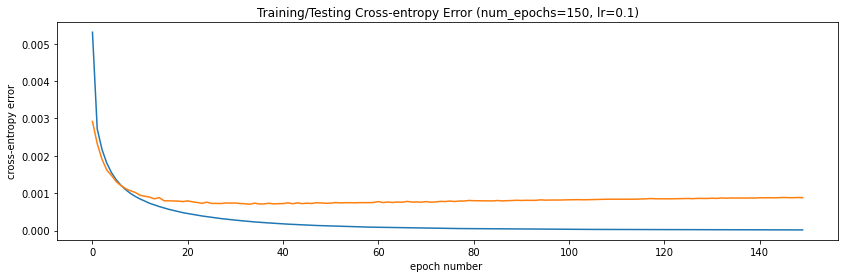

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Second time run: manual_seed(1234)

In [ ]:
# initialize the parameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 200
batch_size = 100
learning_rate = .1

In [ ]:
torch.manual_seed(1234)    # reproducible, set different seeds
class NeuralNet(nn.Module):
     def __init__(self, input_size, hidden_size, num_classes):
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden = nn.Linear(input_size, hidden_size) 
            self.relu = nn.ReLU()
            self.out = nn.Linear(hidden_size, num_classes)  
    
     def forward(self, x):
        # nonlinear activation
        x = F.relu(self.hidden(x))      
        x = self.out(x)                 
        return x
    
net = NeuralNet(input_size, hidden_size, num_classes)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (X_train, labels_train) in enumerate(train_loader):
        train = X_train.reshape(-1, 28*28)
        # forward passing
        out = net(train)
        predicted_train = torch.max(out.data,1)[1]
        batch_error = (predicted_train != labels_train).sum()
        train_error += batch_error
        train_loss = loss_func(out, labels_train)  
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(X_test, labels_test) in enumerate(test_loader):
            test = X_test.reshape(-1, 28*28)
            output = net(test)
            predicted_test = torch.max(output.data,1)[1] 
            test_error += (predicted_test != labels_test).sum()
            test_loss = loss_func(output, labels_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)       

Text(0, 0.5, 'cross-entropy error')

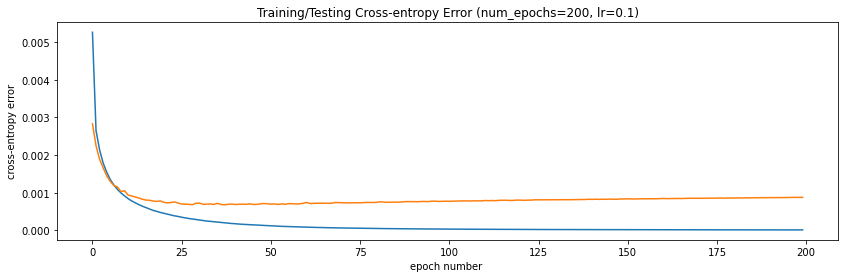

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Third time run: manual_seed(2340)

In [ ]:
# initialize the parameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 150
batch_size = 100
learning_rate = .1

In [ ]:
torch.manual_seed(2340)    # reproducible, set different seeds
class NeuralNet(nn.Module):
     def __init__(self, input_size, hidden_size, num_classes):
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden = nn.Linear(input_size, hidden_size) 
            self.relu = nn.ReLU()
            self.out = nn.Linear(hidden_size, num_classes)  
    
     def forward(self, x):
        # nonlinear activation
        x = F.relu(self.hidden(x))      
        x = self.out(x)                 
        return x
    
net = NeuralNet(input_size, hidden_size, num_classes)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (X_train, labels_train) in enumerate(train_loader):
        train = X_train.reshape(-1, 28*28)
        # forward passing
        out = net(train)
        predicted_train = torch.max(out.data,1)[1]
        batch_error = (predicted_train != labels_train).sum()
        train_error += batch_error
        train_loss = loss_func(out, labels_train)  
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(X_test, labels_test) in enumerate(test_loader):
            test = X_test.reshape(-1, 28*28)
            output = net(test)
            predicted_test = torch.max(output.data,1)[1] 
            test_error += (predicted_test != labels_test).sum()
            test_loss = loss_func(output, labels_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)       

Text(0, 0.5, 'cross-entropy error')

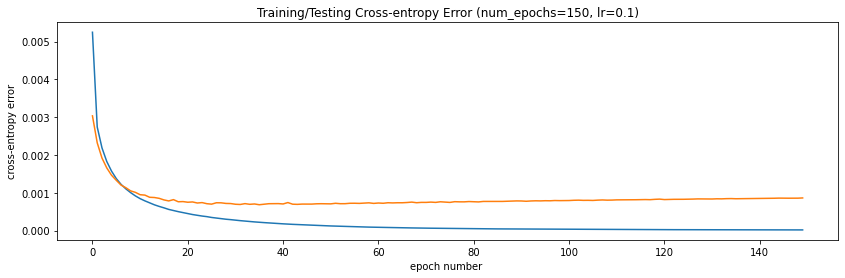

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Fourth time run: manual_seed(100)

In [ ]:
# initialize the parameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 180
batch_size = 100
learning_rate = .1

In [ ]:
torch.manual_seed(100)    # reproducible, set different seeds
class NeuralNet(nn.Module):
     def __init__(self, input_size, hidden_size, num_classes):
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden = nn.Linear(input_size, hidden_size) 
            self.relu = nn.ReLU()
            self.out = nn.Linear(hidden_size, num_classes)  
    
     def forward(self, x):
        # nonlinear activation
        x = F.relu(self.hidden(x))      
        x = self.out(x)                 
        return x
    
net = NeuralNet(input_size, hidden_size, num_classes)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (X_train, labels_train) in enumerate(train_loader):
        train = X_train.reshape(-1, 28*28)
        # forward passing
        out = net(train)
        predicted_train = torch.max(out.data,1)[1]
        batch_error = (predicted_train != labels_train).sum()
        train_error += batch_error
        train_loss = loss_func(out, labels_train)  
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(X_test, labels_test) in enumerate(test_loader):
            test = X_test.reshape(-1, 28*28)
            output = net(test)
            predicted_test = torch.max(output.data,1)[1] 
            test_error += (predicted_test != labels_test).sum()
            test_loss = loss_func(output, labels_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)       

Text(0, 0.5, 'cross-entropy error')

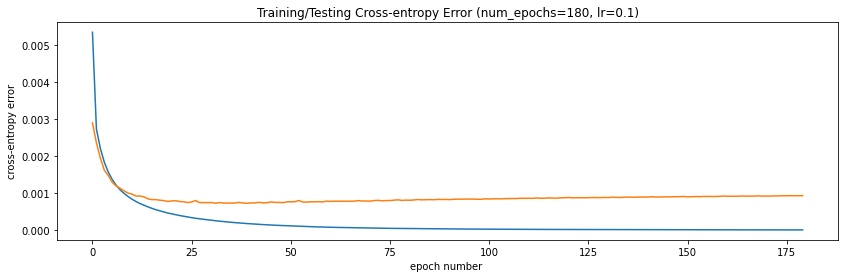

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Fifth time run: manual_seed(3450)

In [ ]:
# initialize the parameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 160
batch_size = 100
learning_rate = .1

In [ ]:
torch.manual_seed(3450)    # reproducible, set different seeds
class NeuralNet(nn.Module):
     def __init__(self, input_size, hidden_size, num_classes):
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden = nn.Linear(input_size, hidden_size) 
            self.relu = nn.ReLU()
            self.out = nn.Linear(hidden_size, num_classes)  
    
     def forward(self, x):
        # nonlinear activation
        x = F.relu(self.hidden(x))      
        x = self.out(x)                 
        return x
    
net = NeuralNet(input_size, hidden_size, num_classes)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (X_train, labels_train) in enumerate(train_loader):
        train = X_train.reshape(-1, 28*28)
        # forward passing
        out = net(train)
        predicted_train = torch.max(out.data,1)[1]
        batch_error = (predicted_train != labels_train).sum()
        train_error += batch_error
        train_loss = loss_func(out, labels_train)  
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(X_test, labels_test) in enumerate(test_loader):
            test = X_test.reshape(-1, 28*28)
            output = net(test)
            predicted_test = torch.max(output.data,1)[1] 
            test_error += (predicted_test != labels_test).sum()
            test_loss = loss_func(output, labels_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)       

Text(0, 0.5, 'cross-entropy error')

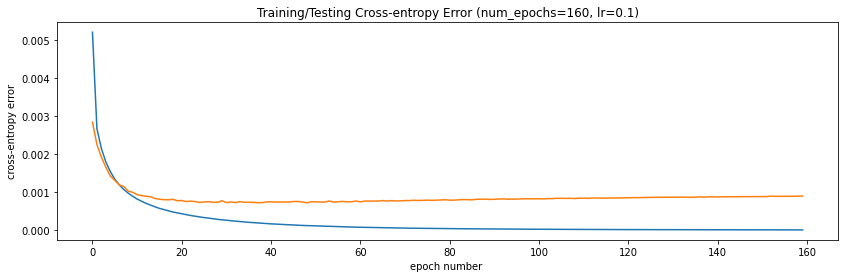

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** In the plot, we can conclude the training error (the blue line) decreases to a sightly larger degree in the first 10 epoch times, and then it decreases more stable after 40 epoch times, and the error decreases to almost 0 after 150-time iterations. <br>
The testing error (the yellow line) is also declining, and after 150 epochs, all five seeds show the model is overfitting since the test error increases. And the testing error starts from 0.003 which is less than 0.005 of the training error initially, it might due to the model has been trained well after the training error. And the updated model can train the testing set well.

(b) We could implement an alternative performance measure to the cross entropy, the mean
miss-classification error. We can consider the output correct if the correct label is given a
higher probability than the incorrect label, then count up the total number of examples
that are classified incorrectly (divided by the total number of examples) according to
this criterion for training and validation respectively, and maintain this statistic at the
end of each epoch. Plot the classification error (in percentage) vs. number of epochs, for
both training and testing. Do you observe a different behavior compared to the behavior
of the cross-entropy error function?

 - First time run: manual_seed(1)

Text(0, 0.5, 'miss-classification error')

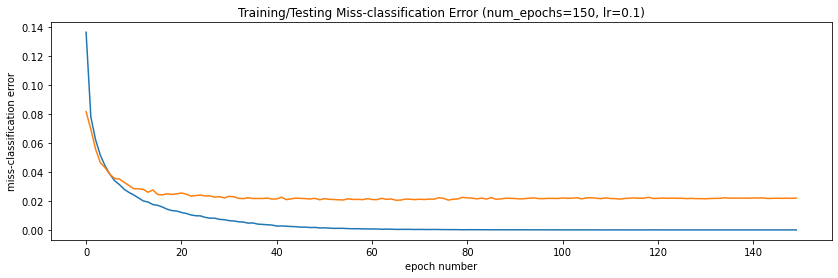

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Miss-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('miss-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Second time run: manual_seed(1234)

Text(0, 0.5, 'miss-classification error')

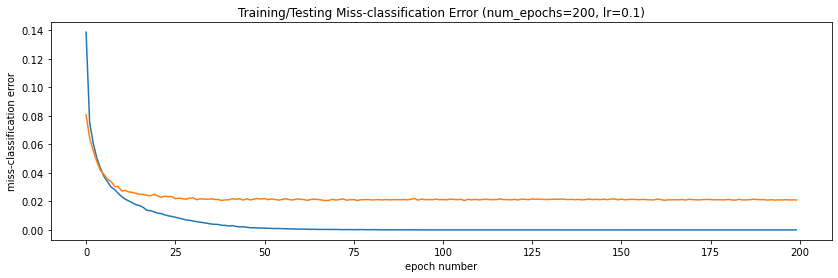

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Miss-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('miss-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

 - Third time run: manual_seed(2340)

Text(0, 0.5, 'miss-classification error')

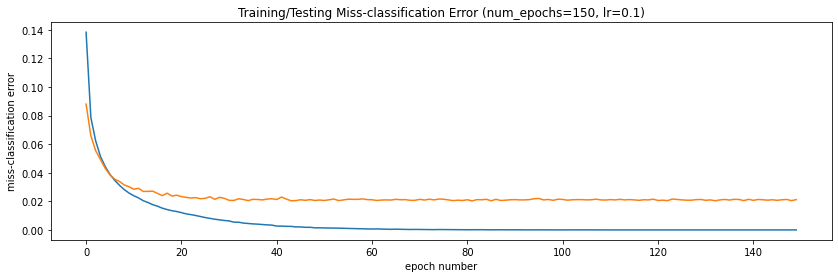

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Miss-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('miss-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Fourth time run: manual_seed(100)

Text(0, 0.5, 'miss-classification error')

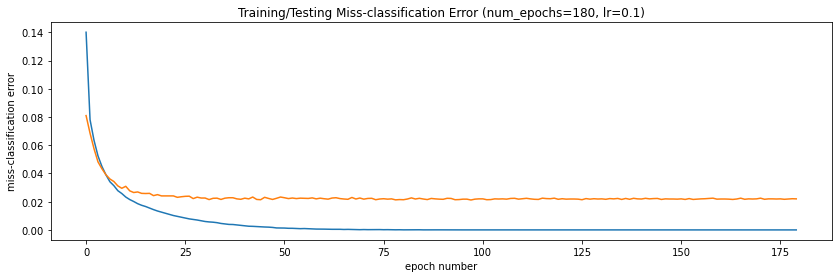

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Miss-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('miss-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Fifth time run: manual_seed(3450)

Text(0, 0.5, 'miss-classification error')

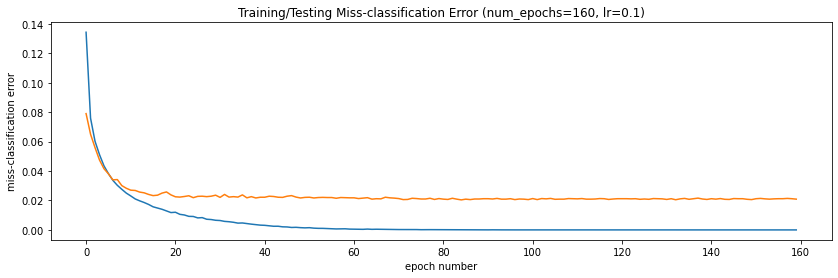

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Miss-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('miss-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** In the plot, we can conclude the mic-classification training error decreases to a sightly larger degree in the first 10 epoch times, from 0.14 to 0.02. And then it decreases more stable after 40 epoch times, and the misclassification error decreases to almost 0 after 150-time iterations. <br>
The misclassification testing error is also declining, but compared with training error, since the model has been trained well, the testing error at the start point has already not big, which is 0.08, and then it shows the overfit since with time increasing, the error increases.<br>
And there are not so much different behaviors between cross-entropy error and miss-classification error, but due to the different methods of calculating errors, the miss-classification error is a bit larger.<br>
And for a neural network classifier, during training we can use mean squared error or average cross-entropy error, and average cross-entropy error is considered slightly better. If we are using back-propagation, the choice of MSE or ACE affects the computation of the gradient. After training, to estimate the effectiveness of the neural network it’s better to use classification error.

(c) Visualize your best results of the learned W as one hundred 28×28 images (plot all filters
as one image, as we have seen in class). Do the learned features exhibit any structure?

Here I campare with the five plots in the (a) part, there are almost the same amont five plots. The fifth trial with manual_seed(3450) and num_epochs = 200,batch_size = 100, learning rate = 0.1. The training error is more close to 0, and the testing error shows the overfitting.<br>
Therefore, I choose this seed.

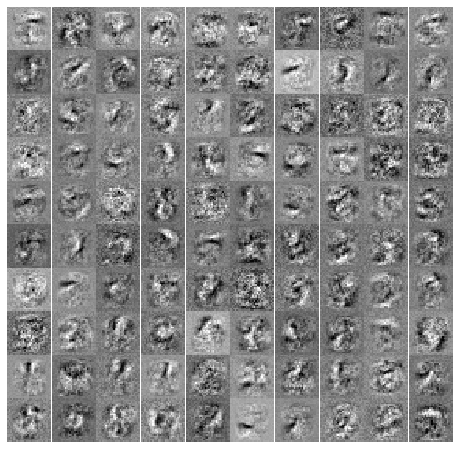

In [ ]:
params = list(net.parameters())[0]
plt.figure(figsize=(8, 8))
for i in range(params.shape[0]):
    plt.subplot(10, 10, i + 1) # Since we know it is a 10 x 10 grid
    x = params[i,:].detach().numpy()
    plt.imshow(x.reshape((28, 28)), cmap = "gray", interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("<filename>.png")

**Answer:** The filter which matches the most with the given input region will produce an output which will be higher in magnitude (compared to the output from other filters).By visualizing filters we get an idea of what pattern each layer has learned to extract from the input. <br>
From the plot, we found that more complex shapes being encoded by the filters. And it can show some of the figures' shape. From the most of the information on numbers is captured, the classification performs well.

(d) Try different values of the learning rate. You should start with a learning rate of 0.1.
You should then reduce it to .01, and increase it to 0.2 and 0.5. What happens to the
convergence properties of the algorithm (looking at both average cross entropy and %
incorrect)? Try momentum of 0.0, 0.5, 0.9. How does momentum affect convergence
rate? How would you choose the best value of these parameters?

 - Try learning rate = .1 <br>
 - Try momentum = 0.0

Text(0, 0.5, 'cross-entropy error')

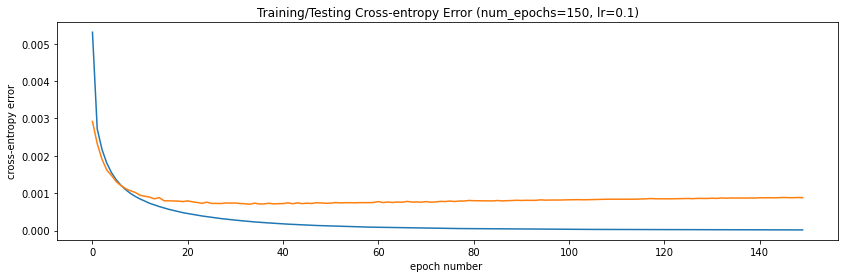

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'miss-classification error')

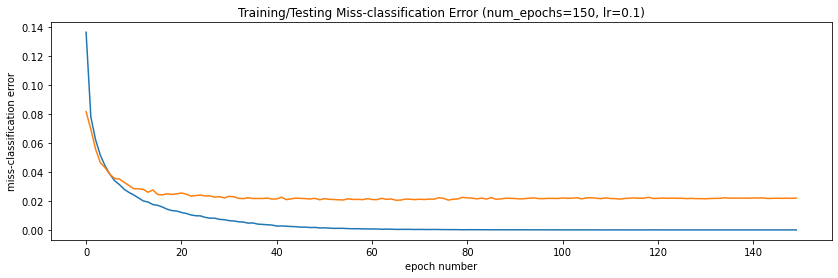

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Miss-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('miss-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

 - Try learning rate = .1
 - Try momentum = 0.5

Text(0, 0.5, 'cross-entropy error')

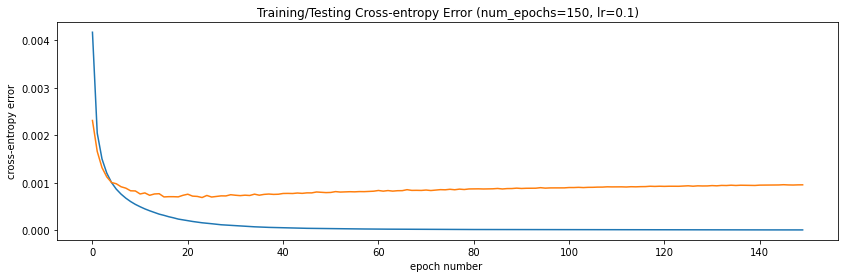

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'miss-classification error')

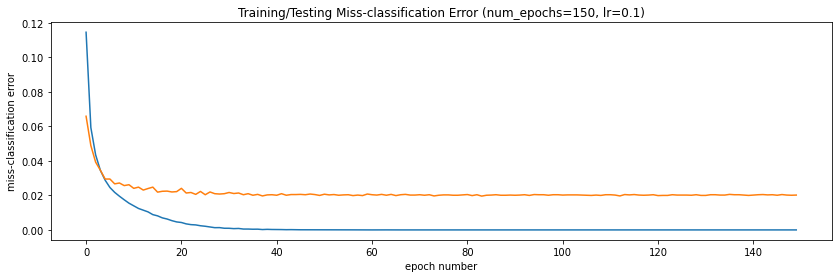

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Miss-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('miss-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

 - Try learning rate = .1
 - Try momentum = .9

Text(0, 0.5, 'cross-entropy error')

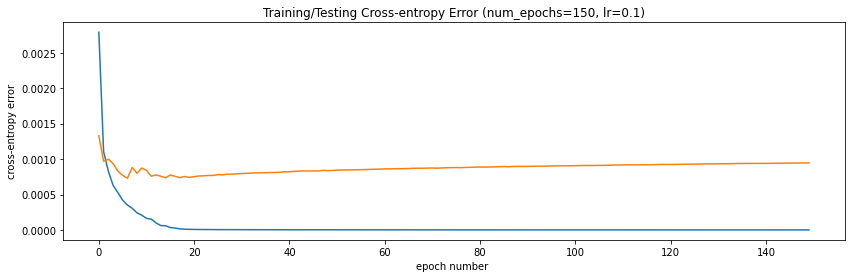

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'miss-classification error')

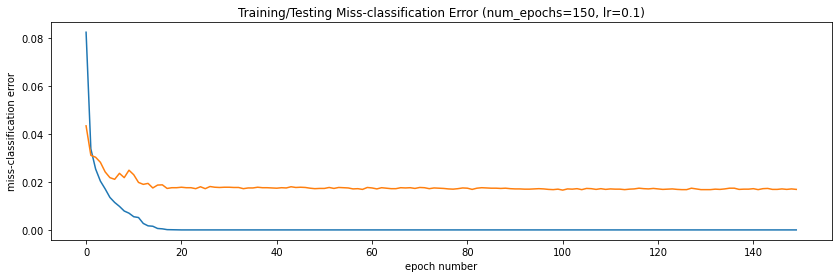

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Miss-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('miss-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

 - Try learning rate = .01
 - Try momentum = 0

Text(0, 0.5, 'cross-entropy error')

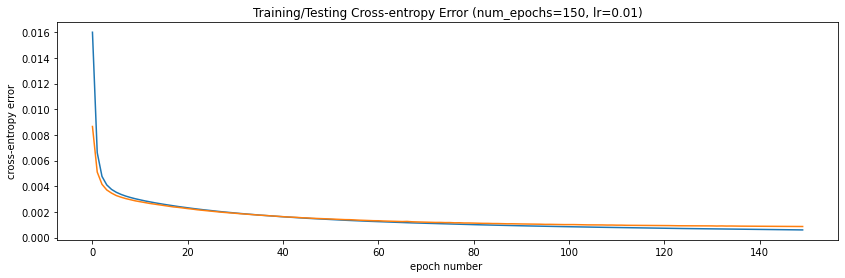

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'miss-classification error')

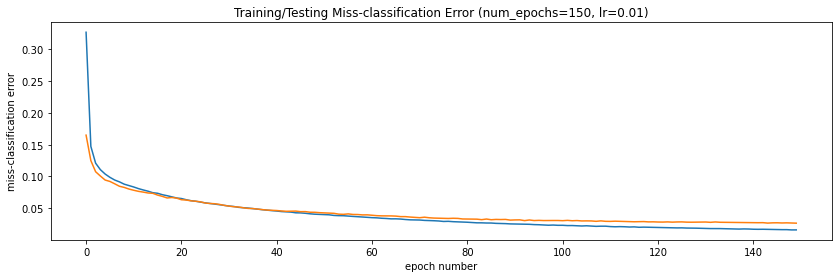

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Miss-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('miss-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = .01
- Try momentum of 0.5

Text(0, 0.5, 'cross-entropy error')

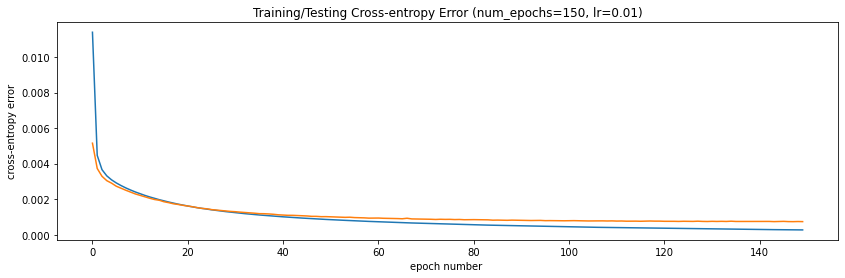

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

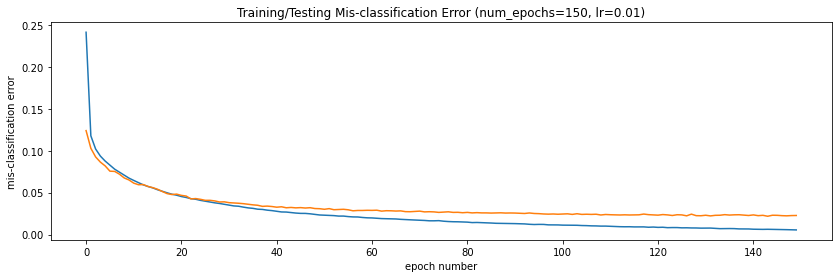

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = .01
- Try momentum of 0.9

Text(0, 0.5, 'cross-entropy error')

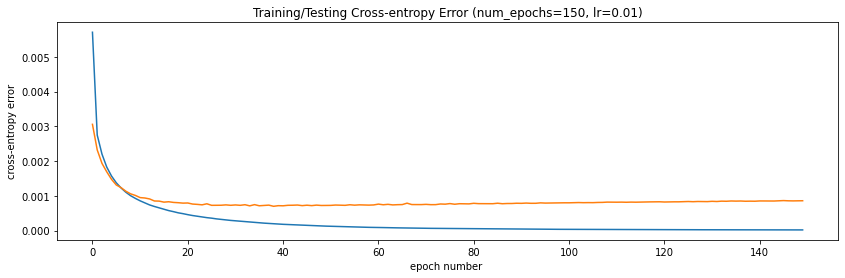

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'miss-classification error')

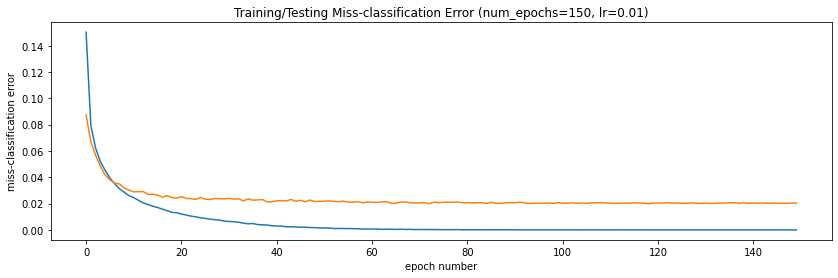

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Miss-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('miss-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.2
- Try momentum of 0

Text(0, 0.5, 'cross-entropy error')

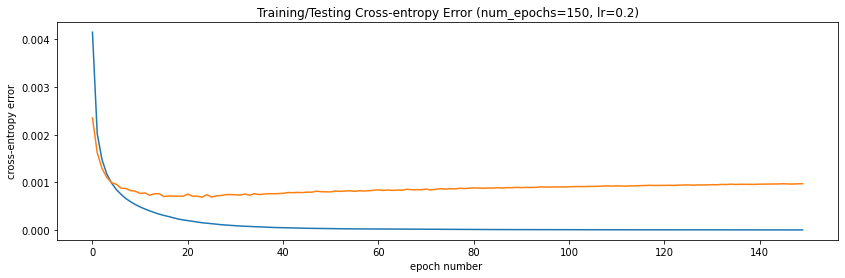

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

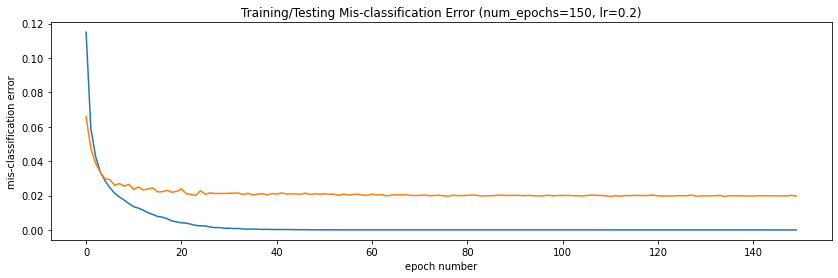

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.2
- Try momentum of 0.5

Text(0, 0.5, 'cross-entropy error')

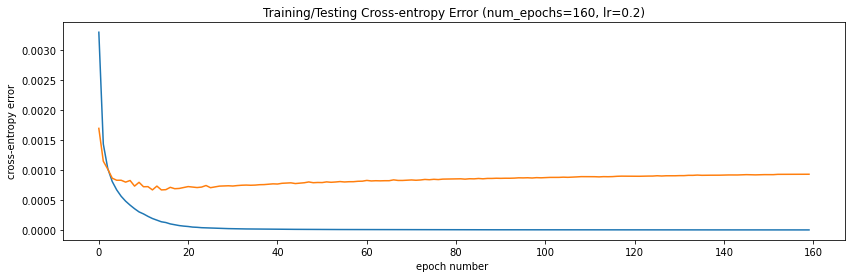

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

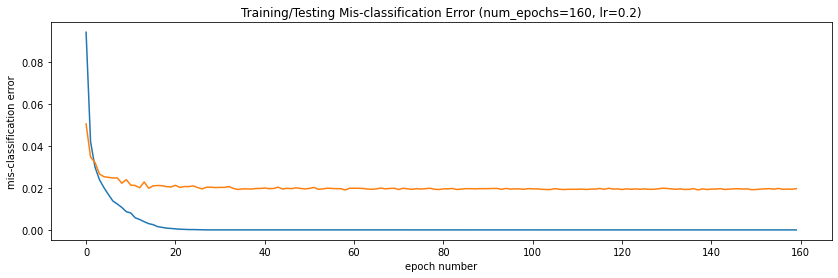

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.2
- Try momentum of 0.9

Text(0, 0.5, 'cross-entropy error')

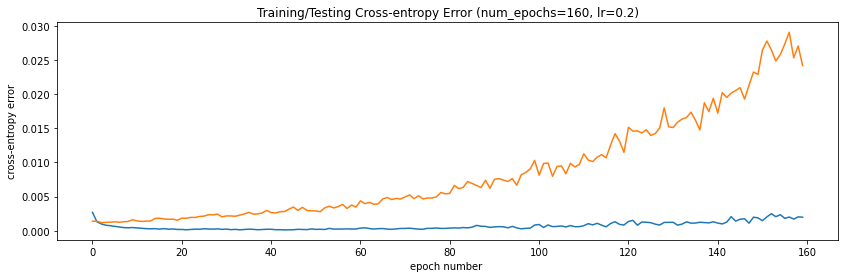

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

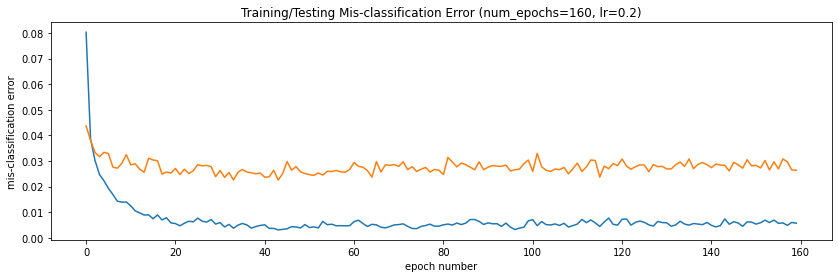

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.5
- Try momentum of 0

Text(0, 0.5, 'cross-entropy error')

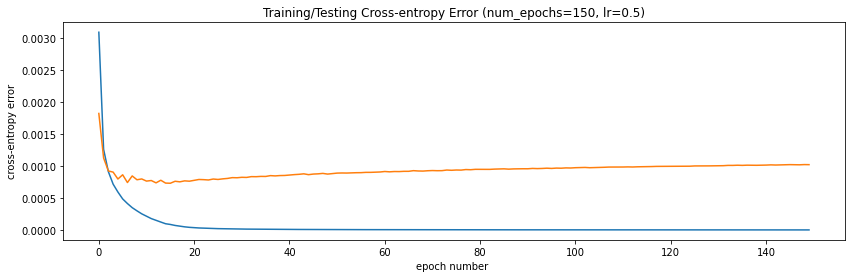

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

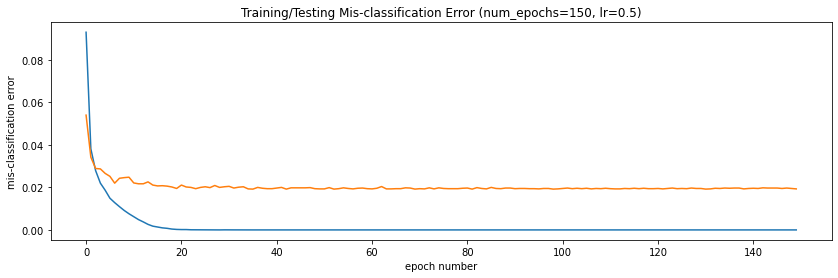

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.5
- Try momentum of 0.5

Text(0, 0.5, 'cross-entropy error')

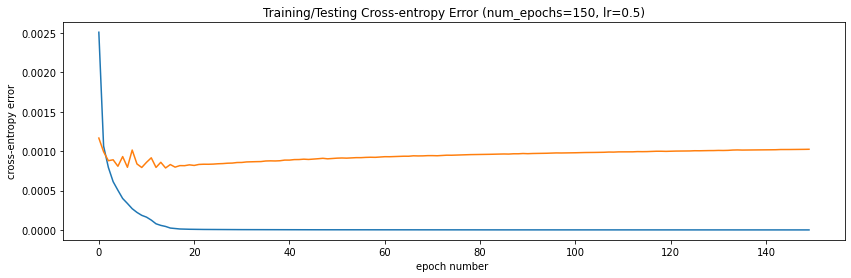

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

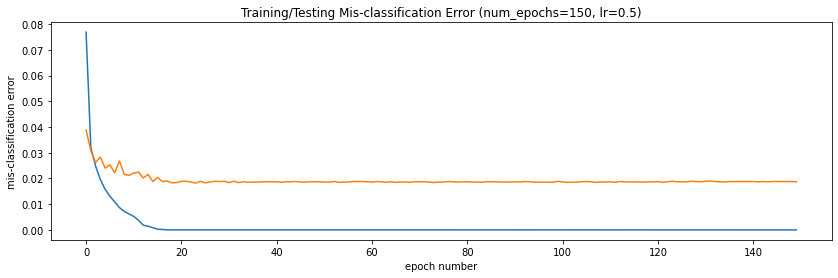

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.5
- Try momentum of 0.9

Text(0, 0.5, 'cross-entropy error')

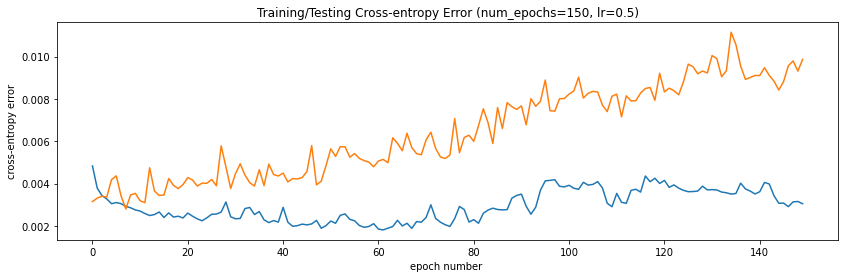

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

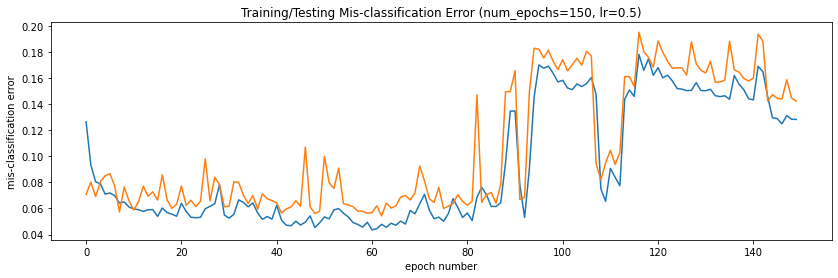

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** here I tried the all combinations of different momentums and learning rates. <br>
- For learning rate, when the learning rate is too small, like 0.01. It is unlikely to show overfitting after 150 epochs times. And if the learning rate is too big, like 0.5. It will cause the model to converge too quickly to a suboptimal solution. Therefore, the learning rate should not be too large or too small, when learning rate = 0.1, it performs well.
- For momentum, when the gradient keeps changing direction, momentum will smooth out the variations. This is particularly useful when the network is not well-conditioned. For most points on the surface, the gradient does not point towards the minimum, and successive steps of gradient descent can oscillate from one side to the other, progressing only very slowly to the minimum. And the addition of momentum helps to speed up convergence to the minimum by damping these oscillations. For our case, when momentum = 0.5, it performs well.

4. Redo part 3(a) - 3(d) with a CNN i.e. with one 2-D convolutional layers → Relu
activation → Maxpooling with appropriate hyperparameters. Compare the best result from
the single layer neural network and the CNN, what could you conclude?

##**CNN with two 2-D convolutional layer**

In [8]:
!nvidia-smi

Sun May  8 20:06:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install mxnet-cu101

     |████████████████████████████████| 358.1 MB 4.8 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [9]:
use_cuda = torch.cuda.is_available()
use_cuda

True

(a) Plot the average training cross-entropy error (sum of the cross-entropy error terms over
the training dataset divided by the total number of training example) on the y-axis
vs. the epoch number (x-axis). On the same figure, plot the average validation cross-
entropy error function. 

- First time: try manual_seed = 1

In [ ]:
batch_size = 100
num_epochs = 150
learning_rate = .1

In [ ]:
train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=torchvision.transforms.ToTensor(), download=DOWNLOAD_MNIST,)
train_loader = Data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
 
test_data = torchvision.datasets.MNIST(root='./mnist/', transform=torchvision.transforms.ToTensor(),train=False)
test_loader = Data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

In [ ]:
torch.manual_seed(1) 

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 320)
        x = self.fc_layers(x)
        return x
    
CNN = CNN()
CNN.cuda()

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): Dropout(p=0.5, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=320, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=50, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(CNN.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (train, labels) in enumerate(train_loader):
        # forward passing
        X_train = train.cuda() 
        Y_labels = labels.cuda()
        out = CNN(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(test, labels) in enumerate(test_loader):
            X_test = test.cuda()
            Y_test = labels.cuda()
            output = CNN(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            test_error += (predicted_test != Y_test).sum()
            test_loss = loss_func(output, Y_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)        

Text(0, 0.5, 'cross-entropy error')

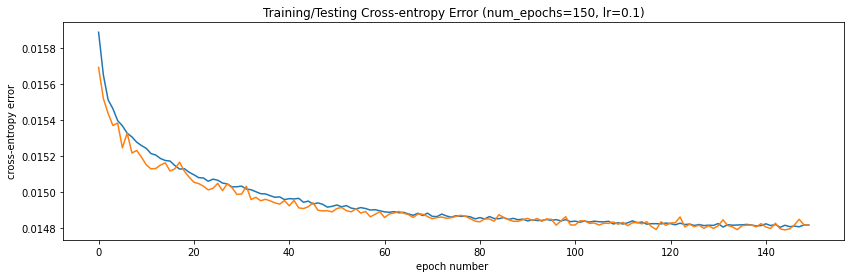

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Second time: try manual_seed = 1234

In [ ]:
batch_size = 100
num_epochs = 180
learning_rate = .1
torch.manual_seed(1234) 

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 320)
        x = self.fc_layers(x)
        return x
    
CNN = CNN()
CNN.cuda()

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): Dropout(p=0.5, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=320, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=50, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)

In [ ]:
optimizer = torch.optim.SGD(CNN.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (train, labels) in enumerate(train_loader):
        # forward passing
        X_train = train.cuda() 
        Y_labels = labels.cuda()
        out = CNN(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(test, labels) in enumerate(test_loader):
            X_test = test.cuda()
            Y_test = labels.cuda()
            output = CNN(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            test_error += (predicted_test != Y_test).sum()
            test_loss = loss_func(output, Y_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)        

Text(0, 0.5, 'cross-entropy error')

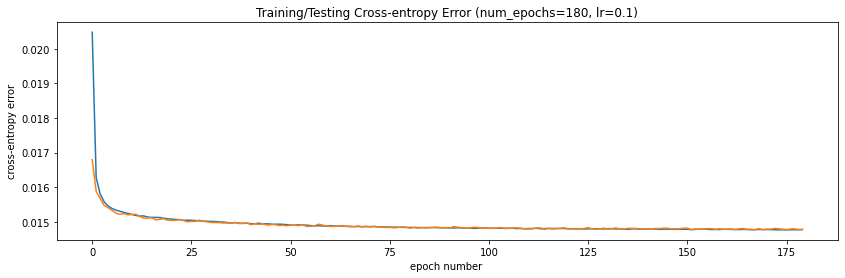

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

 - Third time: try manual_seed = 2340

In [ ]:
batch_size = 100
num_epochs = 150
learning_rate = .1
torch.manual_seed(2340) 

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 320)
        x = self.fc_layers(x)
        return x
    
CNN = CNN()
CNN.cuda()

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): Dropout(p=0.5, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=320, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=50, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)

In [ ]:
optimizer = torch.optim.SGD(CNN.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (train, labels) in enumerate(train_loader):
        # forward passing
        X_train = train.cuda() 
        Y_labels = labels.cuda()
        out = CNN(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(test, labels) in enumerate(test_loader):
            X_test = test.cuda()
            Y_test = labels.cuda()
            output = CNN(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            test_error += (predicted_test != Y_test).sum()
            test_loss = loss_func(output, Y_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)        

Text(0, 0.5, 'cross-entropy error')

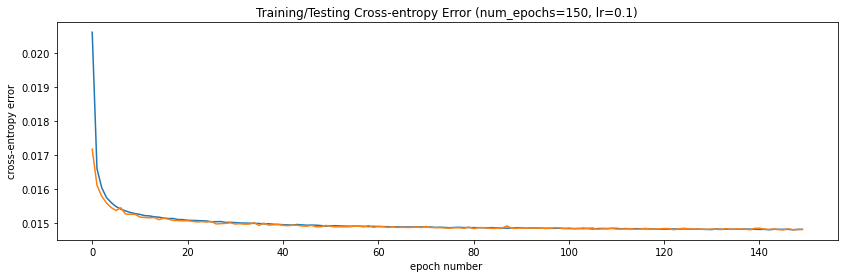

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Fourth time: try manual_seed = 100

In [ ]:
batch_size = 100
num_epochs = 150
learning_rate = .01
torch.manual_seed(100) 

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 320)
        x = self.fc_layers(x)
        return x
    
CNN = CNN()
CNN.cuda()

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): Dropout(p=0.5, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=320, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=50, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)

In [ ]:
optimizer = torch.optim.SGD(CNN.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (train, labels) in enumerate(train_loader):
        # forward passing
        X_train = train.cuda() 
        Y_labels = labels.cuda()
        out = CNN(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(test, labels) in enumerate(test_loader):
            X_test = test.cuda()
            Y_test = labels.cuda()
            output = CNN(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            test_error += (predicted_test != Y_test).sum()
            test_loss = loss_func(output, Y_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)        

Text(0, 0.5, 'cross-entropy error')

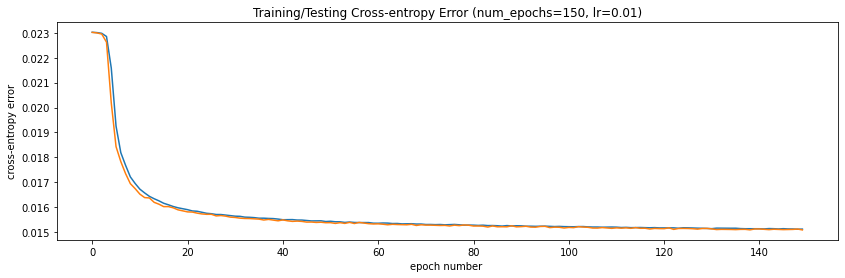

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Fifth time run: manual_seed(3450)

In [ ]:
batch_size = 100
num_epochs = 150
learning_rate = .1
torch.manual_seed(3450) 

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 320)
        x = self.fc_layers(x)
        return x
    
CNN = CNN()
CNN.cuda()

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): Dropout(p=0.5, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=320, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=50, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)

In [ ]:
optimizer = torch.optim.SGD(CNN.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (train, labels) in enumerate(train_loader):
        # forward passing
        X_train = train.cuda() 
        Y_labels = labels.cuda()
        out = CNN(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(test, labels) in enumerate(test_loader):
            X_test = test.cuda()
            Y_test = labels.cuda()
            output = CNN(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            test_error += (predicted_test != Y_test).sum()
            test_loss = loss_func(output, Y_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)        

Text(0, 0.5, 'cross-entropy error')

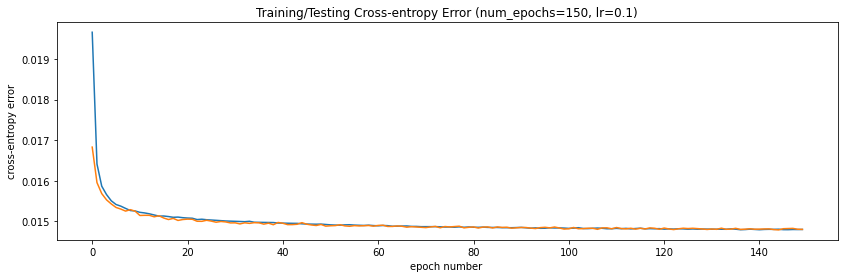

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** In the plot, we can conclude the training error (the blue line) decreases to a sightly larger degree in the first 10 epoch times from 0.02 to 0.015, and then it decreases more stable after 20 epoch times, and the error decreases to almost 0 after 150-time iterations. <br>
The testing error (the yellow line) is also declining, and after 150 epochs, all five seeds show the model is overfitting since the test error increases. And the testing error starts from 0.0165 which is less than 0.02 of the training error initially, it might due to the model has been trained well after the training error. And the updated model can train the testing set well.

(b) We could implement an alternative performance measure to the cross entropy, the mean
miss-classification error. 

- First time: try manual_seed = 1

Text(0, 0.5, 'mis-classification error')

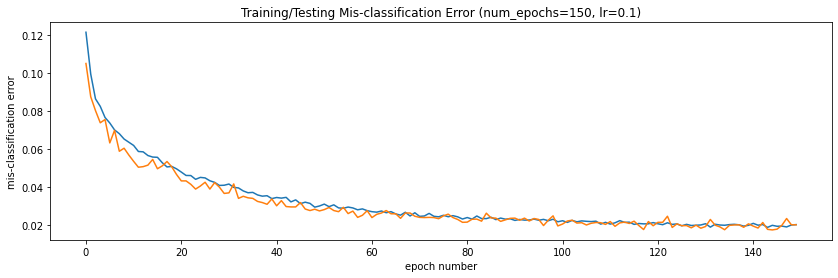

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Second time: try manual_seed = 1234

Text(0, 0.5, 'mis-classification error')

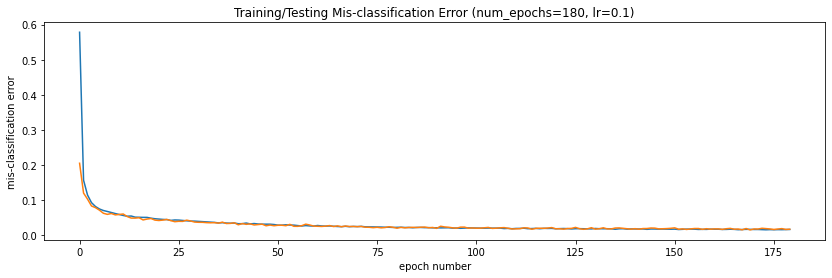

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Third time: try manual_seed = 2340

Text(0, 0.5, 'mis-classification error')

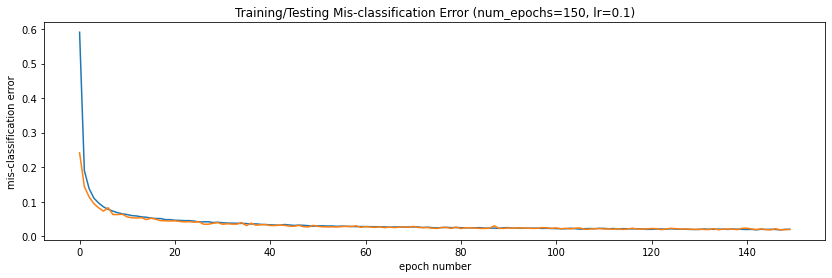

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Fourth time: try manual_seed = 100

Text(0, 0.5, 'mis-classification error')

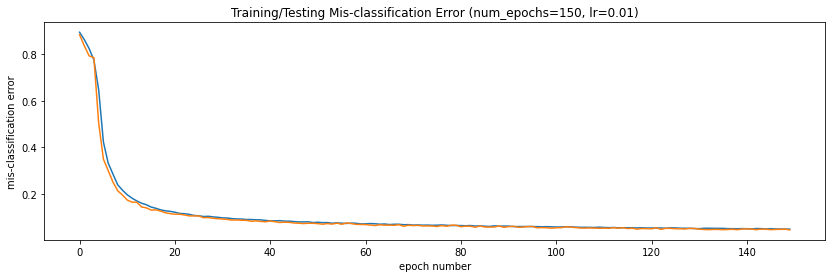

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Fifth time: try manual_seed = 3450

Text(0, 0.5, 'mis-classification error')

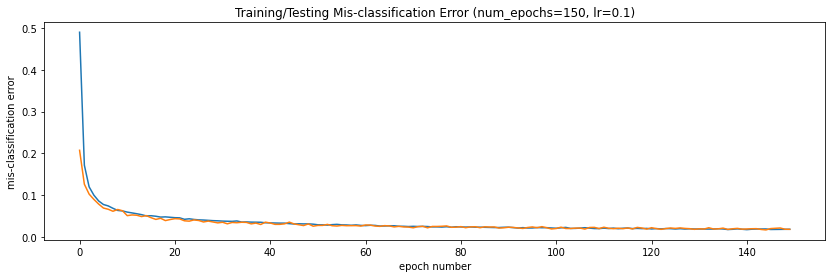

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** In the plot, we can conclude the mic-classification training error decreases to a sightly larger degree in the first 10 epoch times, from 0.5 to 0.1. And then it decreases more stable after 20 epoch times, and the misclassification error decreases to almost 0 after 150-time iterations. <br>
The misclassification testing error is also declining, but compared with cross-entropy error, since the model has been trained well, the testing error at the start point has already not big, which is 0.2, and then it shows the overfit since with time increasing, the error increases.<br>

(c) Visualize your best results of the learned W as one hundred 28×28 images (plot all filters
as one image, as we have seen in class). Do the learned features exhibit any structure?

In [ ]:
for key,value in CNN.state_dict().items():
  print(key)

conv_layers.0.weight
conv_layers.0.bias
conv_layers.3.weight
conv_layers.3.bias
fc_layers.0.weight
fc_layers.0.bias
fc_layers.3.weight
fc_layers.3.bias


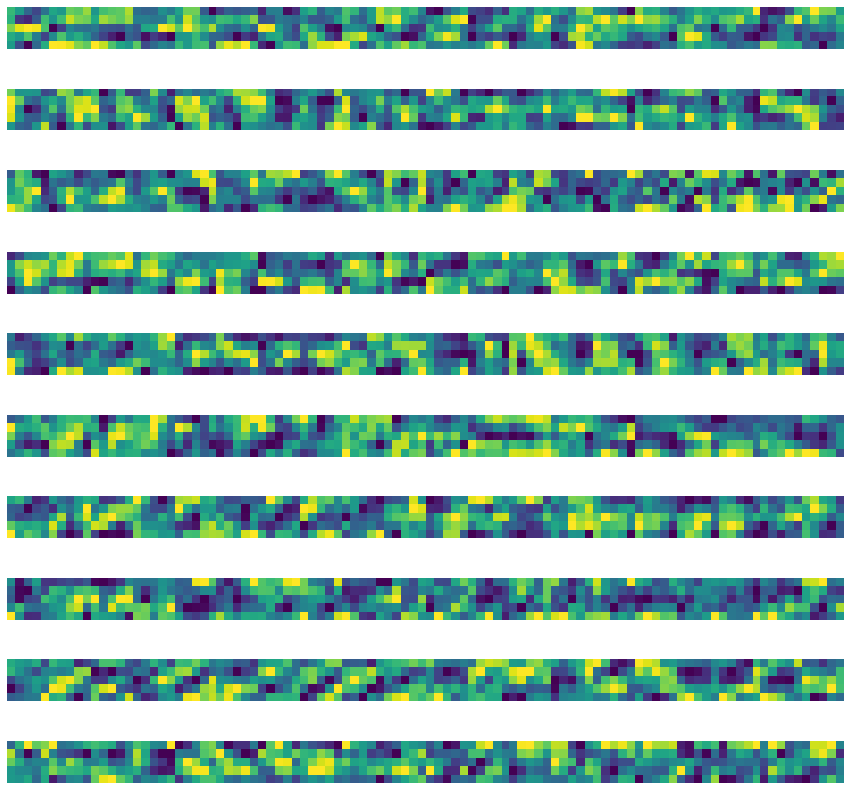

In [ ]:
W = CNN.state_dict()['conv_layers.3.weight'].reshape(200,5,5).cpu()
params = W
plt.figure(figsize=(15, 15))
for i in range(params.shape[0]):
    plt.subplot(10, 20, i + 1) # Since we know it is a 10 x 10 grid
    x = params[i,:].detach().numpy()
    plt.imshow(x.reshape((5,5)), interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("<filename>.png")

**Answer:** The plot creates a figure with 100 images, one row for each filter and one column for each channel.The dark squares indicate small or inhibitory weights and the light squares represent large or excitatory weights. Using this intuition, we can see that the filters on the first row detect a gradient from light in the top left to dark in the bottom right.

(d) Try different values of the learning rate. You should start with a learning rate of 0.1.
You should then reduce it to .01, and increase it to 0.2 and 0.5.

 - Try learning rate = .1 <br>
 - Try momentum = 0.0

Text(0, 0.5, 'cross-entropy error')

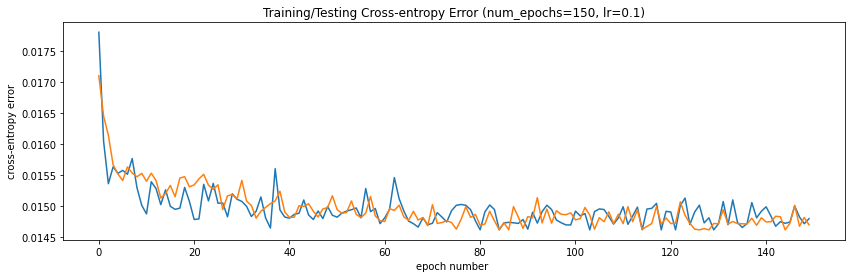

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

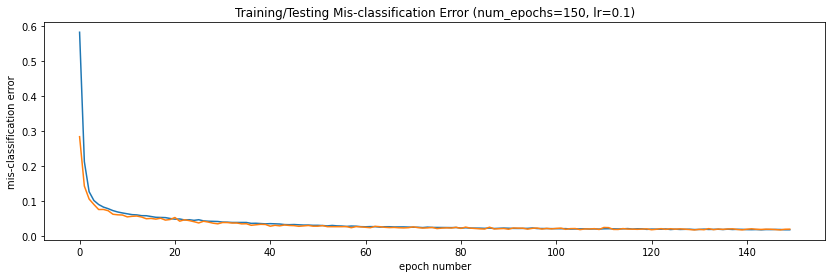

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

 - Try learning rate = .1 <br>
 - Try momentum = 0.5

Text(0, 0.5, 'cross-entropy error')

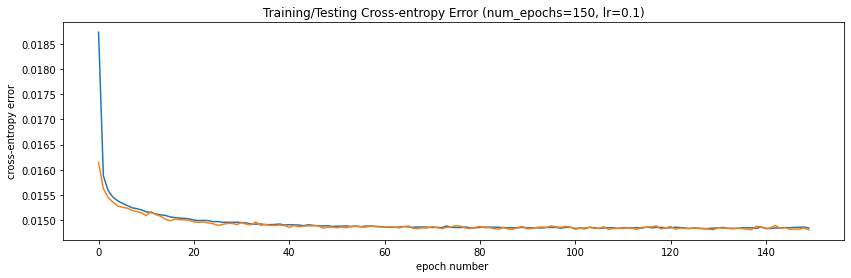

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

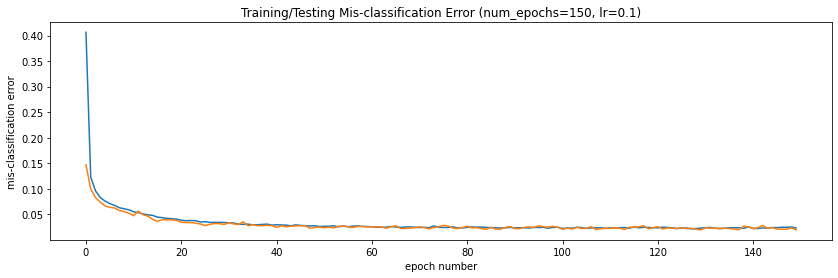

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

 - Try learning rate = .1 <br>
 - Try momentum = 0.9

Text(0, 0.5, 'cross-entropy error')

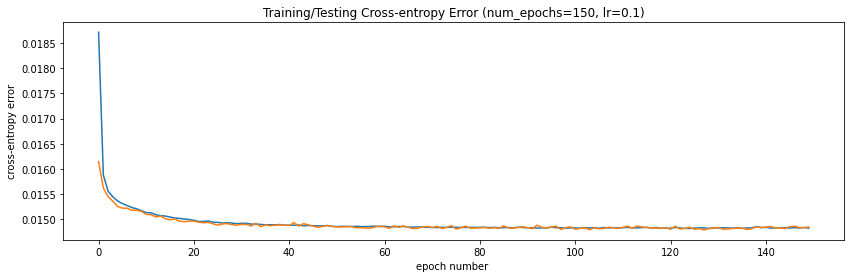

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

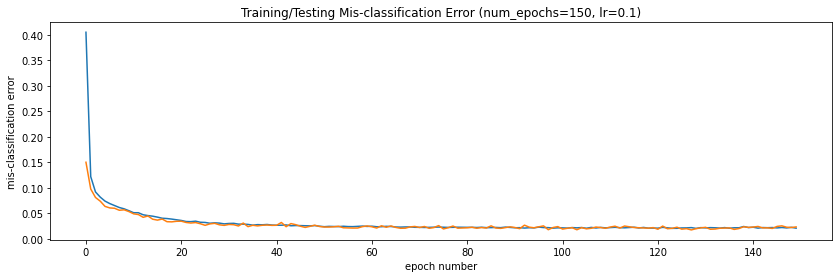

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

 - Try learning rate = .2 <br>
 - Try momentum = 0

Text(0, 0.5, 'cross-entropy error')

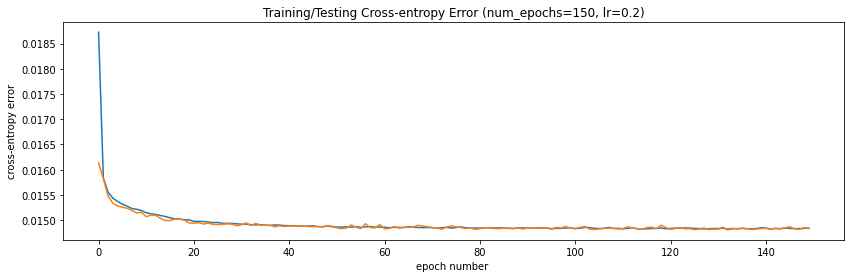

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

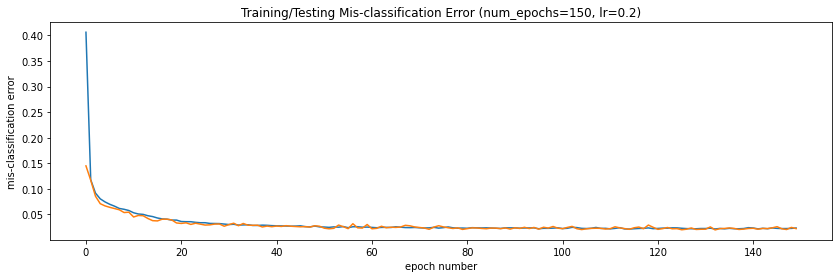

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** here I tried some of combinations of different momentums and learning rates. <br>
- For learning rate, when the learning rate is too small, like 0.01. It is unlikely to show overfitting after 150 epochs times. And if the learning rate is too big, like 0.5. And the training error and testing error are unlikely to converge in the end. Therefore, the learning rate should not be too large or too small, when learning rate = 0.1, it performs well.
- For momentum, when the gradient keeps changing direction, momentum will smooth out the variations. This is particularly useful when the network is not well-conditioned. For most points on the surface, the gradient does not point towards the minimum, and successive steps of gradient descent can oscillate from one side to the other, progressing only very slowly to the minimum. And the addition of momentum helps to speed up convergence to the minimum by damping these oscillations. For our case, when momentum = 0.5, it performs well.

5. Redo part 3(a) - 3(d) with your favorite deep learning architecture (e.g., introducing batch normalization, introducing dropout in training) to beat the performance of SVM with Gaussian Kernel, i.e., to have a test error rate lower than 1.4%.

#**Favorite Deep Learning Architecture**

(a) Plot the average training cross-entropy error (sum of the cross-entropy error terms over
the training dataset divided by the total number of training example) on the y-axis
vs. the epoch number (x-axis).

First time run: manual_seed = 1

In [ ]:
torch.manual_seed(1) 
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(1,32,3,1)
    self.conv1_bn=nn.BatchNorm2d(32)
    
    self.conv2=nn.Conv2d(32,64,3,1)
    self.conv2_bn=nn.BatchNorm2d(64)

    self.conv3=nn.Conv2d(64,128,3,1)
    self.conv3_bn=nn.BatchNorm2d(128)
    
    self.dropout1=nn.Dropout(0.25)
    
    self.fc1=nn.Linear(15488,128)
    self.fc1_bn=nn.BatchNorm1d(128)
    
    self.fc2=nn.Linear(128,64)
    self.fc3=nn.Linear(64,10)
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(self.conv1_bn(x))
    
    x=self.conv2(x)
    x=F.relu(self.conv2_bn(x))

    x=self.conv3(x)
    x=F.relu(self.conv3_bn(x))
    
    x=F.max_pool2d(x,2)
    x=self.dropout1(x)
    
    x=torch.flatten(x,1)
    
    x=self.fc1(x)
    x=F.relu(self.fc1_bn(x))
    
    x=self.fc2(x)
    x=self.fc3(x)
    output=F.log_softmax(x,dim=1)
    return output
net = Net()
net.cuda()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=15488, out_features=128, bias=True)
  (fc1_bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (train, labels) in enumerate(train_loader):
        X_train = train.cuda() 
        Y_labels = labels.cuda()
        # forward passing
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels)  
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(test, labels) in enumerate(test_loader):
            X_test = test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data
            test_error += (predicted_test != Y_test).sum()
            test_loss = loss_func(output, Y_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)       

Text(0, 0.5, 'cross-entropy error')

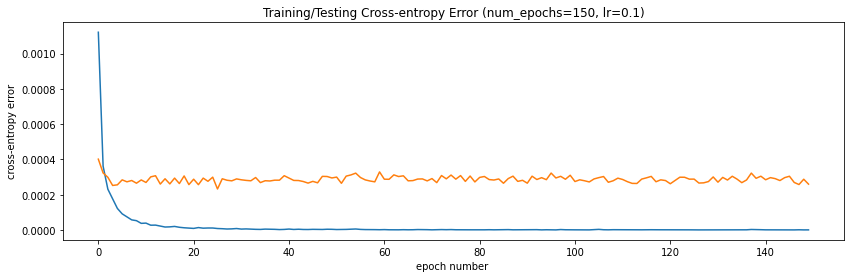

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Second time run: manual_seed = 1234

In [ ]:
torch.manual_seed(1234) 
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(1,32,3,1)
    self.conv1_bn=nn.BatchNorm2d(32)
    
    self.conv2=nn.Conv2d(32,64,3,1)
    self.conv2_bn=nn.BatchNorm2d(64)

    self.conv3=nn.Conv2d(64,128,3,1)
    self.conv3_bn=nn.BatchNorm2d(128)
    
    self.dropout1=nn.Dropout(0.25)
    
    self.fc1=nn.Linear(15488,128)
    self.fc1_bn=nn.BatchNorm1d(128)
    
    self.fc2=nn.Linear(128,64)
    self.fc3=nn.Linear(64,10)
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(self.conv1_bn(x))
    
    x=self.conv2(x)
    x=F.relu(self.conv2_bn(x))

    x=self.conv3(x)
    x=F.relu(self.conv3_bn(x))
    
    x=F.max_pool2d(x,2)
    x=self.dropout1(x)
    
    x=torch.flatten(x,1)
    
    x=self.fc1(x)
    x=F.relu(self.fc1_bn(x))
    
    x=self.fc2(x)
    x=self.fc3(x)
    output=F.log_softmax(x,dim=1)
    return output
net = Net()
net.cuda()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=15488, out_features=128, bias=True)
  (fc1_bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (train, labels) in enumerate(train_loader):
        X_train = train.cuda() 
        Y_labels = labels.cuda()
        # forward passing
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels)  
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(test, labels) in enumerate(test_loader):
            X_test = test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data
            test_error += (predicted_test != Y_test).sum()
            test_loss = loss_func(output, Y_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)       

Text(0, 0.5, 'cross-entropy error')

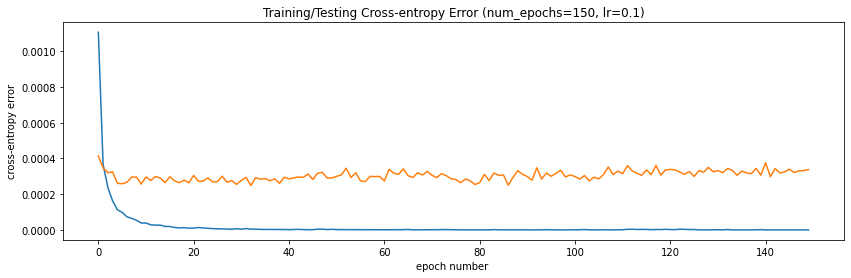

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Third time run: manual_seed = 2340


In [ ]:
torch.manual_seed(2340) 
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(1,32,3,1)
    self.conv1_bn=nn.BatchNorm2d(32)
    
    self.conv2=nn.Conv2d(32,64,3,1)
    self.conv2_bn=nn.BatchNorm2d(64)

    self.conv3=nn.Conv2d(64,128,3,1)
    self.conv3_bn=nn.BatchNorm2d(128)
    
    self.dropout1=nn.Dropout(0.25)
    
    self.fc1=nn.Linear(15488,128)
    self.fc1_bn=nn.BatchNorm1d(128)
    
    self.fc2=nn.Linear(128,64)
    self.fc3=nn.Linear(64,10)
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(self.conv1_bn(x))
    
    x=self.conv2(x)
    x=F.relu(self.conv2_bn(x))

    x=self.conv3(x)
    x=F.relu(self.conv3_bn(x))
    
    x=F.max_pool2d(x,2)
    x=self.dropout1(x)
    
    x=torch.flatten(x,1)
    
    x=self.fc1(x)
    x=F.relu(self.fc1_bn(x))
    
    x=self.fc2(x)
    x=self.fc3(x)
    output=F.log_softmax(x,dim=1)
    return output
net = Net()
net.cuda()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=15488, out_features=128, bias=True)
  (fc1_bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (train, labels) in enumerate(train_loader):
        X_train = train.cuda() 
        Y_labels = labels.cuda()
        # forward passing
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels)  
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(test, labels) in enumerate(test_loader):
            X_test = test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data
            test_error += (predicted_test != Y_test).sum()
            test_loss = loss_func(output, Y_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)       

Text(0, 0.5, 'cross-entropy error')

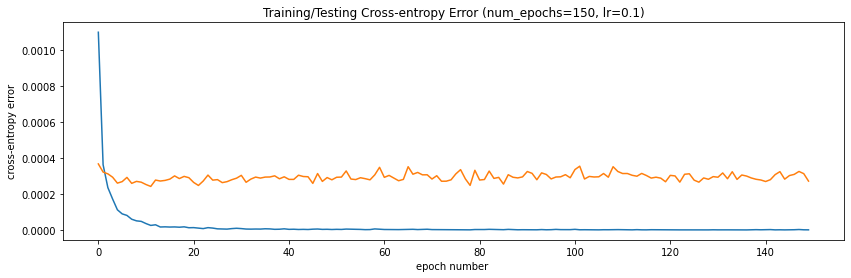

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Fourth time run: manual_seed = 100

In [ ]:
torch.manual_seed(100) 
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(1,32,3,1)
    self.conv1_bn=nn.BatchNorm2d(32)
    
    self.conv2=nn.Conv2d(32,64,3,1)
    self.conv2_bn=nn.BatchNorm2d(64)

    self.conv3=nn.Conv2d(64,128,3,1)
    self.conv3_bn=nn.BatchNorm2d(128)
    
    self.dropout1=nn.Dropout(0.25)
    
    self.fc1=nn.Linear(15488,128)
    self.fc1_bn=nn.BatchNorm1d(128)
    
    self.fc2=nn.Linear(128,64)
    self.fc3=nn.Linear(64,10)
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(self.conv1_bn(x))
    
    x=self.conv2(x)
    x=F.relu(self.conv2_bn(x))

    x=self.conv3(x)
    x=F.relu(self.conv3_bn(x))
    
    x=F.max_pool2d(x,2)
    x=self.dropout1(x)
    
    x=torch.flatten(x,1)
    
    x=self.fc1(x)
    x=F.relu(self.fc1_bn(x))
    
    x=self.fc2(x)
    x=self.fc3(x)
    output=F.log_softmax(x,dim=1)
    return output
net = Net()
net.cuda()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=15488, out_features=128, bias=True)
  (fc1_bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (train, labels) in enumerate(train_loader):
        X_train = train.cuda() 
        Y_labels = labels.cuda()
        # forward passing
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels)  
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(test, labels) in enumerate(test_loader):
            X_test = test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data
            test_error += (predicted_test != Y_test).sum()
            test_loss = loss_func(output, Y_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)       

Text(0, 0.5, 'cross-entropy error')

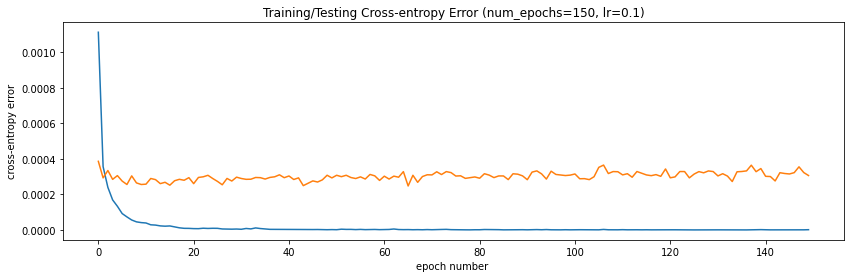

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Fifth time run: manual_seed = 3450

In [10]:
torch.manual_seed(3450) 
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(1,32,3,1)
    self.conv1_bn=nn.BatchNorm2d(32)
    
    self.conv2=nn.Conv2d(32,64,3,1)
    self.conv2_bn=nn.BatchNorm2d(64)

    self.conv3=nn.Conv2d(64,128,3,1)
    self.conv3_bn=nn.BatchNorm2d(128)
    
    self.dropout1=nn.Dropout(0.25)
    
    self.fc1=nn.Linear(15488,128)
    self.fc1_bn=nn.BatchNorm1d(128)
    
    self.fc2=nn.Linear(128,64)
    self.fc3=nn.Linear(64,10)
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(self.conv1_bn(x))
    
    x=self.conv2(x)
    x=F.relu(self.conv2_bn(x))

    x=self.conv3(x)
    x=F.relu(self.conv3_bn(x))
    
    x=F.max_pool2d(x,2)
    x=self.dropout1(x)
    
    x=torch.flatten(x,1)
    
    x=self.fc1(x)
    x=F.relu(self.fc1_bn(x))
    
    x=self.fc2(x)
    x=self.fc3(x)
    output=F.log_softmax(x,dim=1)
    return output
net = Net()
net.cuda()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=15488, out_features=128, bias=True)
  (fc1_bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [11]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [12]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (train, labels) in enumerate(train_loader):
        X_train = train.cuda() 
        Y_labels = labels.cuda()
        # forward passing
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels)  
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b,(test, labels) in enumerate(test_loader):
            X_test = test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data
            test_error += (predicted_test != Y_test).sum()
            test_loss = loss_func(output, Y_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)       

Epoch [1/150], Step[100/60000], Loss: 0.1449
Epoch [1/150], Step[200/60000], Loss: 0.1179
Epoch [1/150], Step[300/60000], Loss: 0.0180
Epoch [1/150], Step[400/60000], Loss: 0.0881
Epoch [1/150], Step[500/60000], Loss: 0.0332
Epoch [1/150], Step[600/60000], Loss: 0.0865
Epoch [2/150], Step[100/60000], Loss: 0.0336
Epoch [2/150], Step[200/60000], Loss: 0.0510
Epoch [2/150], Step[300/60000], Loss: 0.0045
Epoch [2/150], Step[400/60000], Loss: 0.1368
Epoch [2/150], Step[500/60000], Loss: 0.0040
Epoch [2/150], Step[600/60000], Loss: 0.0197
Epoch [3/150], Step[100/60000], Loss: 0.0651
Epoch [3/150], Step[200/60000], Loss: 0.0321
Epoch [3/150], Step[300/60000], Loss: 0.0137
Epoch [3/150], Step[400/60000], Loss: 0.0425
Epoch [3/150], Step[500/60000], Loss: 0.0164
Epoch [3/150], Step[600/60000], Loss: 0.0980
Epoch [4/150], Step[100/60000], Loss: 0.0030
Epoch [4/150], Step[200/60000], Loss: 0.0043
Epoch [4/150], Step[300/60000], Loss: 0.0048
Epoch [4/150], Step[400/60000], Loss: 0.0092
Epoch [4/1

Text(0, 0.5, 'cross-entropy error')

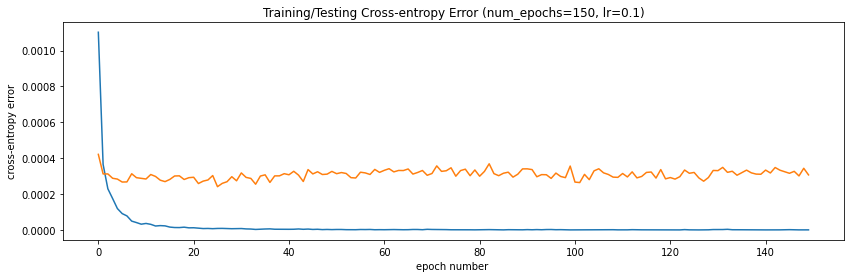

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** In the plot, we can conclude the training error (the blue line) decreases to a sightly larger degree in the first 10 epoch times from 0.001 to 0.0015, and then it decreases more stable after 20 epoch times, and the error decreases to almost 0 after 150-time iterations. <br>
The testing error (the yellow line) is also declining, and after 150 epochs, all five seeds show the model is overfitting since the test error increases. And the testing error starts from 0.0004 which is less than 0.001 of the training error initially, it might due to the model has been trained well after the training error. And the updated model can train the testing set well.

(b) Plot the classification error (in percentage) vs. number of epochs, for
both training and testing.

First time run: manual_seed = 1

Text(0, 0.5, 'mis-classification error')

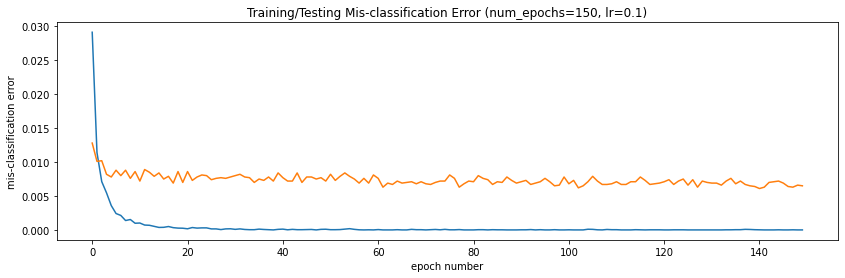

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Second time run: manual_seed = 1234

Text(0, 0.5, 'mis-classification error')

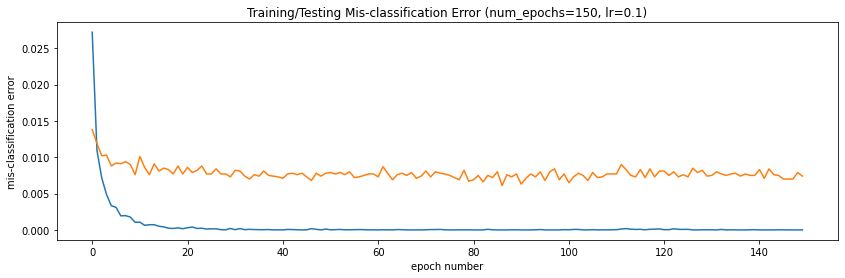

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Third time run: manual_seed = 2340

Text(0, 0.5, 'mis-classification error')

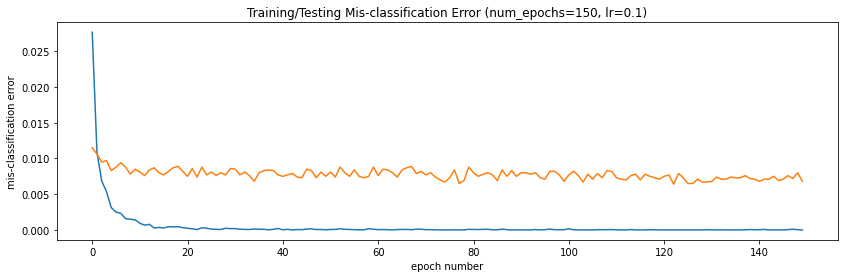

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Fourth time run: manual_seed = 100

Text(0, 0.5, 'mis-classification error')

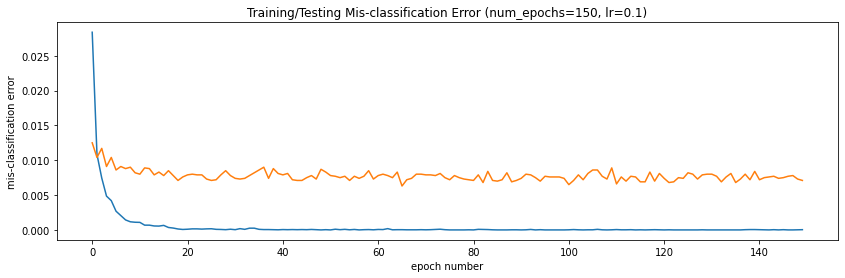

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Fifth time run: manual_seed = 3450

In [13]:
for key,value in net.state_dict().items():
  print(key)

conv1.weight
conv1.bias
conv1_bn.weight
conv1_bn.bias
conv1_bn.running_mean
conv1_bn.running_var
conv1_bn.num_batches_tracked
conv2.weight
conv2.bias
conv2_bn.weight
conv2_bn.bias
conv2_bn.running_mean
conv2_bn.running_var
conv2_bn.num_batches_tracked
conv3.weight
conv3.bias
conv3_bn.weight
conv3_bn.bias
conv3_bn.running_mean
conv3_bn.running_var
conv3_bn.num_batches_tracked
fc1.weight
fc1.bias
fc1_bn.weight
fc1_bn.bias
fc1_bn.running_mean
fc1_bn.running_var
fc1_bn.num_batches_tracked
fc2.weight
fc2.bias
fc3.weight
fc3.bias


Text(0, 0.5, 'mis-classification error')

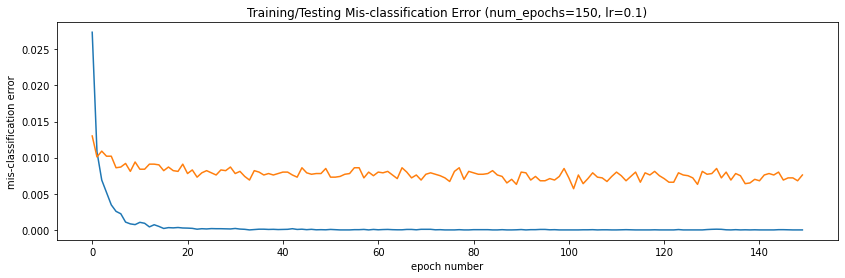

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** In the plot, we can conclude the mic-classification training error decreases to a sightly larger degree in the first 10 epoch times, from 0.025 to 0.005. And then it decreases more stable after 20 epoch times, and the misclassification error decreases to almost 0 after 150-time iterations. <br>
The misclassification testing error is also declining, but compared with cross-entropy error, since the model has been trained well, the testing error at the start point has already not big, which is 0.01, and then it shows the overfit since with time increasing, the error increases.<br>

Here the testing error will reach about 0.01 in the end, which is less than 1.4% of the SVM with
Gaussian Kernel.

(c) Visualize your best results of the learned W as one hundred 28×28 images (plot all filters
as one image, as we have seen in class). Do the learned features exhibit any structure?

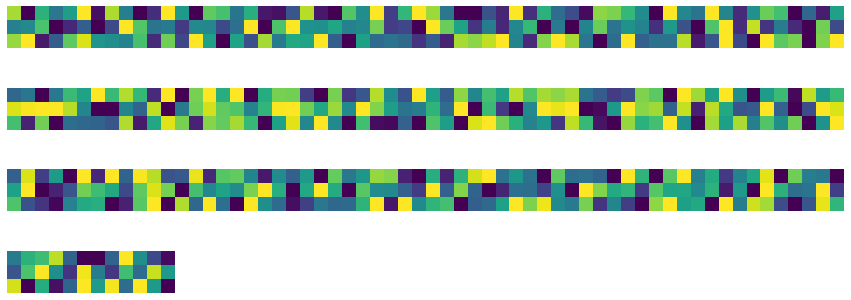

In [16]:

W = net.state_dict()['conv2.weight'].cpu()
params = W
plt.figure(figsize=(15, 15))
for i in range(params.shape[0]):
    plt.subplot(10, 20, i + 1) # Since we know it is a 10 x 10 grid
    x = params[i,:].detach().numpy()
    plt.imshow(x[0,:,:], interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("<filename>.png")

**Answer:** The plot creates a figure with 10 images, one row for each filter and one column for each channel.The dark squares indicate small or inhibitory weights and the light squares represent large or excitatory weights. 

(d) Try different values of the learning rate. How does momentum affect convergence
rate? How would you choose the best value of these parameters?

- Try learning rate = 0.01
- Try momentum = 0.5

Text(0, 0.5, 'cross-entropy error')

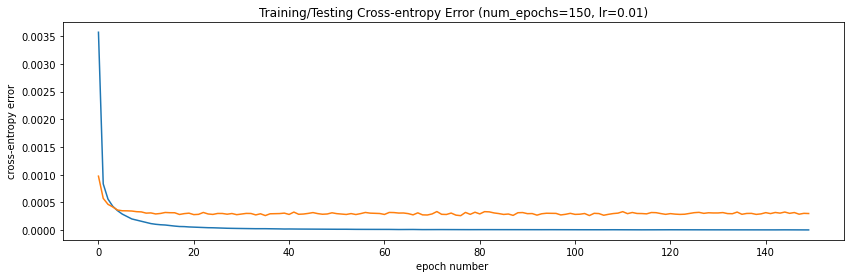

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

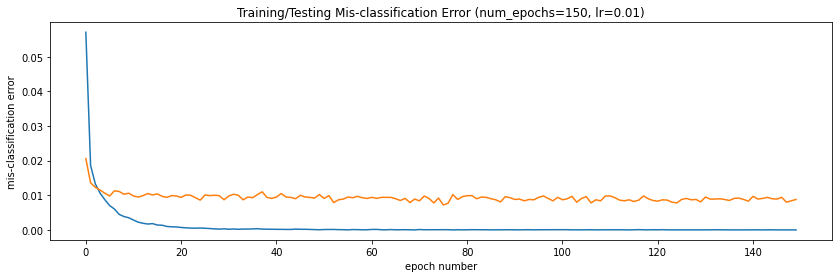

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.01
- Try momentum = 0.9

Text(0, 0.5, 'cross-entropy error')

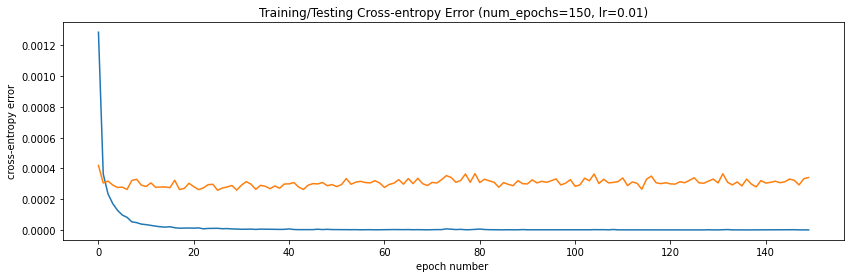

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

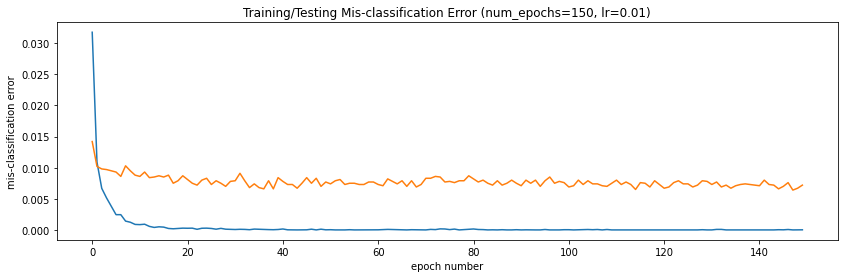

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.1
- Try momentum = 0.5

Text(0, 0.5, 'cross-entropy error')

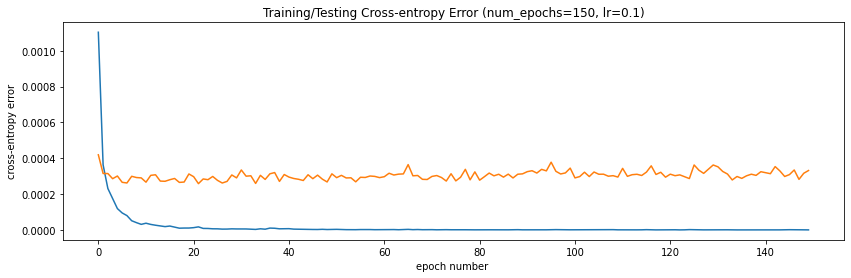

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

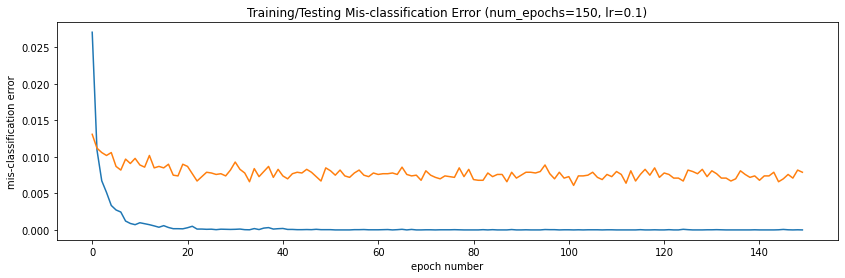

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.1
- Try momentum = 0.9

Text(0, 0.5, 'cross-entropy error')

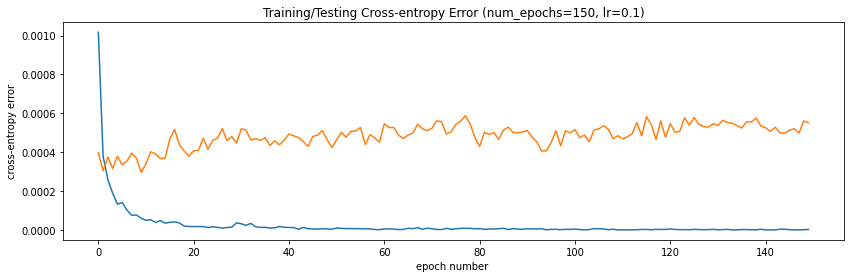

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

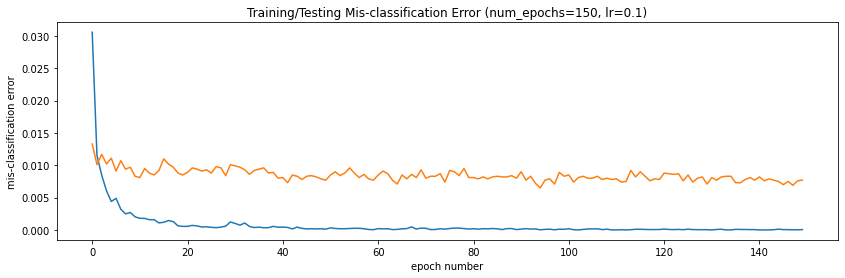

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.2
- Try momentum = 0

Text(0, 0.5, 'cross-entropy error')

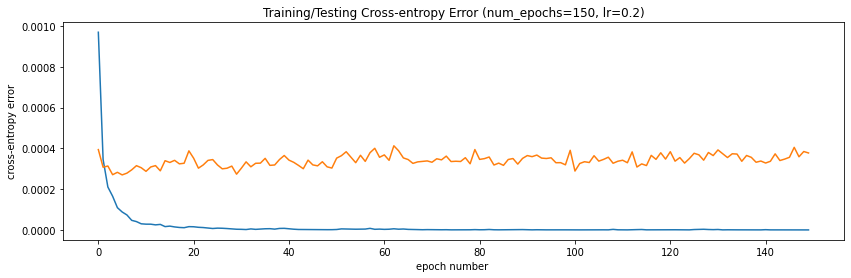

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

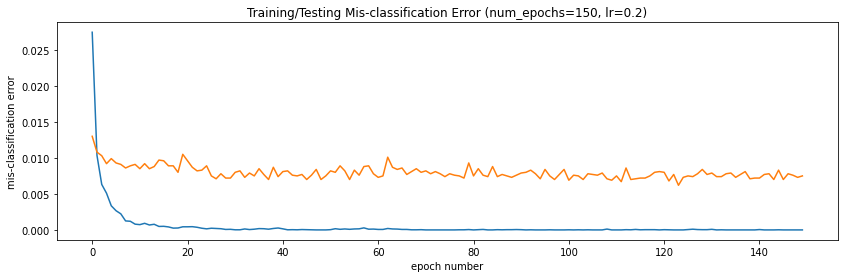

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning_rate = .2
- Try momentum = 0.9

Text(0, 0.5, 'cross-entropy error')

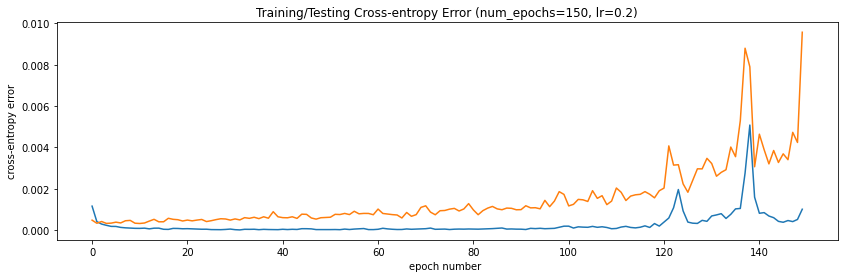

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train")
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

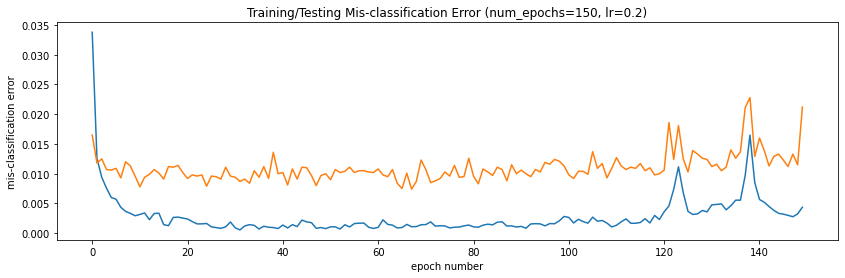

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train")
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** here I tried some of combinations of different momentums and learning rates. <br>
- For learning rate, when the learning rate is too small, like 0.01. It is unlikely to show overfitting after 150 epochs times. And if the learning rate is too big, like 0.5. And the training error and testing error are unlikely to converge in the end. Therefore, the learning rate should not be too large or too small, when learning rate = 0.1, it performs well.
- For momentum, when the gradient keeps changing direction, momentum will smooth out the variations. This is particularly useful when the network is not well-conditioned. For most points on the surface, the gradient does not point towards the minimum, and successive steps of gradient descent can oscillate from one side to the other, progressing only very slowly to the minimum. And the addition of momentum helps to speed up convergence to the minimum by damping these oscillations. But when momentum = 0.9, the testing error and training error will have large oscillations. For our case, when momentum = 0.5, it performs well.

#**5 More about Deep Learning**

6. As a warm up question, load the data and plot a few examples. Decide if the pixels
were scanned out in row-major or column-major order. What is the relationship between the
2 digits and the last coordinate of each line?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_table('/content/drive/My Drive/Colab Notebooks/train.txt',sep=',',header=None)
test = pd.read_table('/content/drive/My Drive/Colab Notebooks/test.txt',sep=',',header=None)
val = pd.read_table('/content/drive/My Drive/Colab Notebooks/val.txt',sep=',',header=None)

In [ ]:
def pixel_mat(row):
    # we're working with train_df so we want to drop the label column
    vec = train.iloc[row][:1568].values
    # numpy provides the reshape() function to reorganize arrays into specified shapes
    pixel_mat = vec.reshape(28,56)
    return pixel_mat

5.0


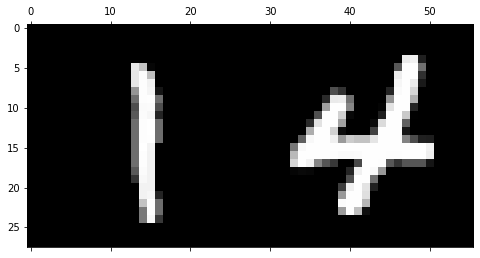

In [ ]:
print(train.iloc[0][1568])
plt.matshow(pixel_mat(0), cmap=plt.cm.gray)

15.0


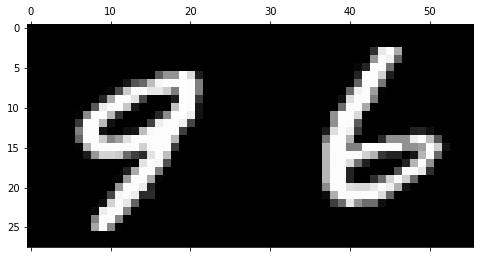

In [ ]:
print(train.iloc[100][1568])
plt.matshow(pixel_mat(100), cmap=plt.cm.gray)

6.0


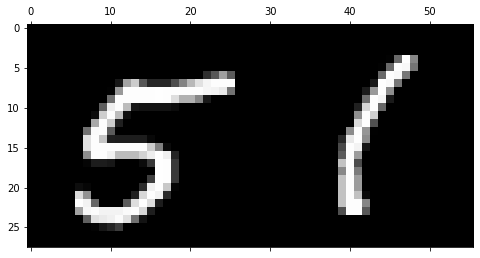

In [ ]:
print(train.iloc[300][1568])
plt.matshow(pixel_mat(300), cmap=plt.cm.gray)

We can conclude that the pixels were scanned out in row-major order. And from the three examples we plot, the last coordinate of each line is the sum of the 2 digits.

7. Repeat part 3(a) - 3(d) with at least two of your favorite deep learning architecture
(e.g., introducing batch normalization, introducing dropout in training) with respect to with
train.txt, val.txt and test.txt.

##**Data Preprocessing**

In [ ]:
# initialize the parameters
input_size = 1568
hidden_size = 100
num_classes = 10
num_epochs = 150
batch_size = 100
learning_rate = .1

In [ ]:
train_x_reshape = np.array(train.iloc[:,:1568]).reshape(20000,28,56)
test_x_reshape = np.array(test.iloc[:,:1568]).reshape(5000,28,56)
val_x_reshape = np.array(val.iloc[:,:1568]).reshape(5000,28,56)

In [ ]:
train_y_reshape = np.array(train.iloc[:,1568])
test_y_reshape = np.array(test.iloc[:,1568])
val_y_reshape = np.array(val.iloc[:,1568])

In [ ]:
train_x_tensor = torch.tensor(train_x_reshape)
test_x_tensor = torch.tensor(test_x_reshape)
val_x_tensor = torch.tensor(val_x_reshape)

In [ ]:
train_y_tensor = torch.tensor(train_y_reshape)
test_y_tensor = torch.tensor(test_y_reshape)
val_y_tensor = torch.tensor(val_y_reshape)

In [ ]:
train_dataset = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
test_dataset = torch.utils.data.TensorDataset(test_x_tensor, test_y_tensor)
val_dataset = torch.utils.data.TensorDataset(val_x_tensor, val_y_tensor)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size = batch_size,shuffle=False)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset,batch_size = batch_size,shuffle=False)

(a) Using train.txt to train your models.

##**Model 1: CNN with three 2-D convolutional layers**

- Plot the average training cross-entropy error 
- Plot the classification error (in percentage) vs. number of epochs

- First time run: manual seed = 1

In [ ]:
torch.manual_seed(1)
class cnn(torch.nn.Module):
    def __init__(self):
      super(cnn, self).__init__()
      self.conv1 = nn.Sequential(         
        nn.Conv2d(1, 36, 3, 1,1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv2 = nn.Sequential(         
        nn.Conv2d(36, 72, 3, 1,1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv3 = nn.Sequential(         
        nn.Conv2d(72, 144, 3, 1,1),                              
        nn.ReLU(),                      
        nn.Flatten()    
        )
      self.l1 = nn.Linear(144*7*14, 512)
      self.l2 = nn.Linear(512, 19)
    def forward(self, X):
      X = self.conv1(X)
      X = self.conv2(X)
      X = self.conv3(X)       
      X = nn.functional.relu(self.l1(X))
      X = self.l2(X)
      return X
net = cnn()
net.cuda()

cnn(
  (conv1): Sequential(
    (0): Conv2d(1, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(36, 72, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(72, 144, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
  )
  (l1): Linear(in_features=14112, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=19, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_val = []
errors_train = []
errors_val = []
for epoch in range(num_epochs):
    train_error = 0
    val_error = 0
    train_loss_sum = 0
    val_loss_sum = 0
    for i, (train,labels) in enumerate(train_loader):
        # forward passing
        x_train = train.float().reshape(100,1,28,56)
        X_train = x_train.cuda()
        Y_labels = labels.cuda()
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b, (test,labels) in enumerate(val_loader):
            x_test = test.float().reshape(100,1,28,56)
            X_test = x_test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            val_error += (predicted_test != Y_test).sum()
            val_loss = loss_func(output, Y_test)
            val_loss_sum += val_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_val.append(val_loss_sum.item()/batch_size)
    errors_val.append(val_error.item()/batch_size)               

Epoch [1/150], Step[100/60000], Loss: 2.8188
Epoch [1/150], Step[200/60000], Loss: 2.5109
Epoch [2/150], Step[100/60000], Loss: 2.2650
Epoch [2/150], Step[200/60000], Loss: 1.5985
Epoch [3/150], Step[100/60000], Loss: 1.1108
Epoch [3/150], Step[200/60000], Loss: 0.6726
Epoch [4/150], Step[100/60000], Loss: 0.4318
Epoch [4/150], Step[200/60000], Loss: 0.4132
Epoch [5/150], Step[100/60000], Loss: 0.2299
Epoch [5/150], Step[200/60000], Loss: 0.4077
Epoch [6/150], Step[100/60000], Loss: 0.1104
Epoch [6/150], Step[200/60000], Loss: 0.1202
Epoch [7/150], Step[100/60000], Loss: 0.2109
Epoch [7/150], Step[200/60000], Loss: 0.0673
Epoch [8/150], Step[100/60000], Loss: 0.0655
Epoch [8/150], Step[200/60000], Loss: 0.0594
Epoch [9/150], Step[100/60000], Loss: 0.0948
Epoch [9/150], Step[200/60000], Loss: 0.0723
Epoch [10/150], Step[100/60000], Loss: 0.0733
Epoch [10/150], Step[200/60000], Loss: 0.0379
Epoch [11/150], Step[100/60000], Loss: 0.0478
Epoch [11/150], Step[200/60000], Loss: 0.0233
Epoch 

Text(0, 0.5, 'cross-entropy error')

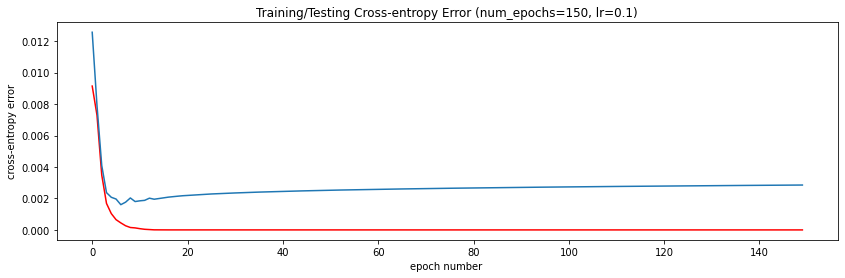

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

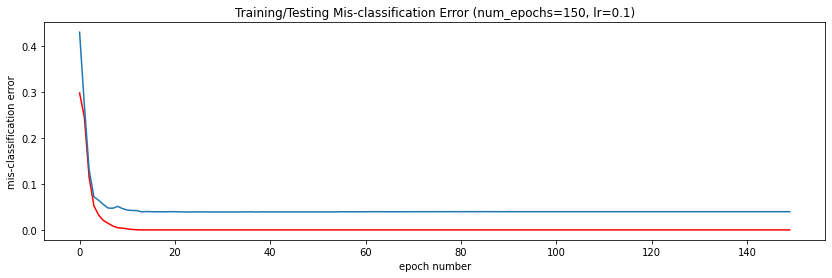

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Second time run: manual seed = 1234

In [ ]:
torch.manual_seed(1234)
class cnn(torch.nn.Module):
    def __init__(self):
      super(cnn, self).__init__()
      self.conv1 = nn.Sequential(         
        nn.Conv2d(1, 36, 3, 1,1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv2 = nn.Sequential(         
        nn.Conv2d(36, 72, 3, 1,1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv3 = nn.Sequential(         
        nn.Conv2d(72, 144, 3, 1,1),                              
        nn.ReLU(),                      
        nn.Flatten()    
        )
      self.l1 = nn.Linear(144*7*14, 512)
      self.l2 = nn.Linear(512, 19)
    def forward(self, X):
      X = self.conv1(X)
      X = self.conv2(X)
      X = self.conv3(X)       
      X = nn.functional.relu(self.l1(X))
      X = self.l2(X)
      return X
net = cnn()
net.cuda()

cnn(
  (conv1): Sequential(
    (0): Conv2d(1, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(36, 72, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(72, 144, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
  )
  (l1): Linear(in_features=14112, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=19, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_val = []
errors_train = []
errors_val = []
for epoch in range(num_epochs):
    train_error = 0
    val_error = 0
    train_loss_sum = 0
    val_loss_sum = 0
    for i, (train,labels) in enumerate(train_loader):
        # forward passing
        x_train = train.float().reshape(100,1,28,56)
        X_train = x_train.cuda()
        Y_labels = labels.cuda()
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b, (test,labels) in enumerate(val_loader):
            x_test = test.float().reshape(100,1,28,56)
            X_test = x_test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            val_error += (predicted_test != Y_test).sum()
            val_loss = loss_func(output, Y_test)
            val_loss_sum += val_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_val.append(val_loss_sum.item()/batch_size)
    errors_val.append(val_error.item()/batch_size)               

Epoch [1/150], Step[100/60000], Loss: 2.7525
Epoch [1/150], Step[200/60000], Loss: 2.4931
Epoch [2/150], Step[100/60000], Loss: 2.0992
Epoch [2/150], Step[200/60000], Loss: 1.3732
Epoch [3/150], Step[100/60000], Loss: 0.7000
Epoch [3/150], Step[200/60000], Loss: 0.6715
Epoch [4/150], Step[100/60000], Loss: 0.7642
Epoch [4/150], Step[200/60000], Loss: 0.3922
Epoch [5/150], Step[100/60000], Loss: 0.2854
Epoch [5/150], Step[200/60000], Loss: 0.1872
Epoch [6/150], Step[100/60000], Loss: 0.1160
Epoch [6/150], Step[200/60000], Loss: 0.1324
Epoch [7/150], Step[100/60000], Loss: 0.1092
Epoch [7/150], Step[200/60000], Loss: 0.0916
Epoch [8/150], Step[100/60000], Loss: 0.0298
Epoch [8/150], Step[200/60000], Loss: 0.0665
Epoch [9/150], Step[100/60000], Loss: 0.0297
Epoch [9/150], Step[200/60000], Loss: 0.0751
Epoch [10/150], Step[100/60000], Loss: 0.0150
Epoch [10/150], Step[200/60000], Loss: 0.0101
Epoch [11/150], Step[100/60000], Loss: 0.0031
Epoch [11/150], Step[200/60000], Loss: 0.0017
Epoch 

Text(0, 0.5, 'cross-entropy error')

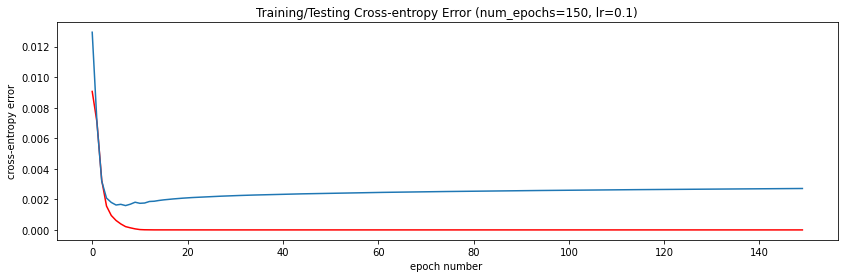

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

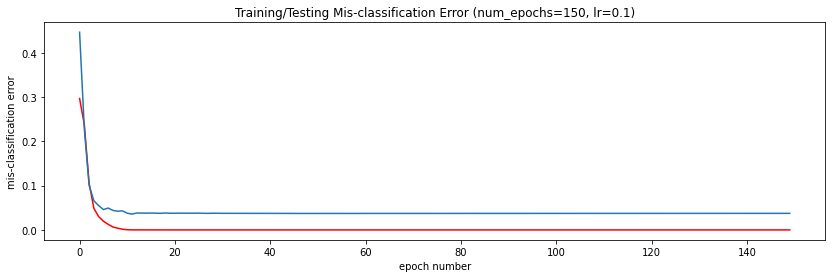

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Third time run: try manual_seed = 2340

In [ ]:
torch.manual_seed(2340)
class cnn(torch.nn.Module):
    def __init__(self):
      super(cnn, self).__init__()
      self.conv1 = nn.Sequential(         
        nn.Conv2d(1, 36, 3, 1,1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv2 = nn.Sequential(         
        nn.Conv2d(36, 72, 3, 1,1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv3 = nn.Sequential(         
        nn.Conv2d(72, 144, 3, 1,1),                              
        nn.ReLU(),                      
        nn.Flatten()    
        )
      self.l1 = nn.Linear(144*7*14, 512)
      self.l2 = nn.Linear(512, 19)
    def forward(self, X):
      X = self.conv1(X)
      X = self.conv2(X)
      X = self.conv3(X)       
      X = nn.functional.relu(self.l1(X))
      X = self.l2(X)
      return X
net = cnn()
net.cuda()

cnn(
  (conv1): Sequential(
    (0): Conv2d(1, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(36, 72, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(72, 144, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
  )
  (l1): Linear(in_features=14112, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=19, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_val = []
errors_train = []
errors_val = []
for epoch in range(num_epochs):
    train_error = 0
    val_error = 0
    train_loss_sum = 0
    val_loss_sum = 0
    for i, (train,labels) in enumerate(train_loader):
        # forward passing
        x_train = train.float().reshape(100,1,28,56)
        X_train = x_train.cuda()
        Y_labels = labels.cuda()
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b, (test,labels) in enumerate(val_loader):
            x_test = test.float().reshape(100,1,28,56)
            X_test = x_test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            val_error += (predicted_test != Y_test).sum()
            val_loss = loss_func(output, Y_test)
            val_loss_sum += val_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_val.append(val_loss_sum.item()/batch_size)
    errors_val.append(val_error.item()/batch_size)               

Epoch [1/150], Step[100/60000], Loss: 2.7760
Epoch [1/150], Step[200/60000], Loss: 2.5166
Epoch [2/150], Step[100/60000], Loss: 2.4092
Epoch [2/150], Step[200/60000], Loss: 1.5699
Epoch [3/150], Step[100/60000], Loss: 0.8899
Epoch [3/150], Step[200/60000], Loss: 0.6754
Epoch [4/150], Step[100/60000], Loss: 0.4610
Epoch [4/150], Step[200/60000], Loss: 0.2316
Epoch [5/150], Step[100/60000], Loss: 0.3130
Epoch [5/150], Step[200/60000], Loss: 0.2934
Epoch [6/150], Step[100/60000], Loss: 0.1586
Epoch [6/150], Step[200/60000], Loss: 0.1509
Epoch [7/150], Step[100/60000], Loss: 0.1599
Epoch [7/150], Step[200/60000], Loss: 0.2187
Epoch [8/150], Step[100/60000], Loss: 0.0533
Epoch [8/150], Step[200/60000], Loss: 0.0586
Epoch [9/150], Step[100/60000], Loss: 0.0389
Epoch [9/150], Step[200/60000], Loss: 0.0250
Epoch [10/150], Step[100/60000], Loss: 0.0291
Epoch [10/150], Step[200/60000], Loss: 0.0227
Epoch [11/150], Step[100/60000], Loss: 0.0043
Epoch [11/150], Step[200/60000], Loss: 0.0344
Epoch 

Text(0, 0.5, 'cross-entropy error')

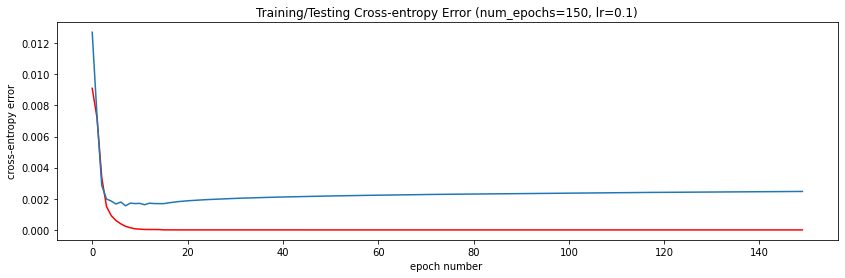

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

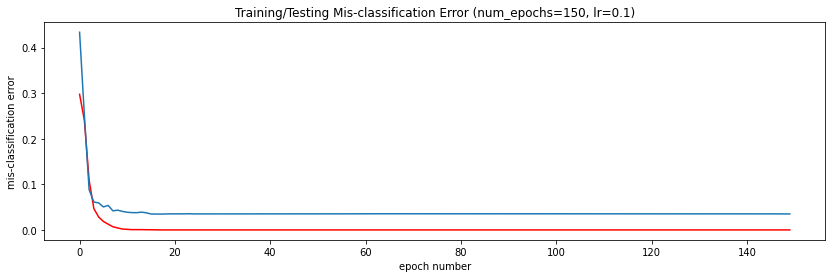

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Fourth time run: try manual seed = 100

In [ ]:
torch.manual_seed(100)
class cnn(torch.nn.Module):
    def __init__(self):
      super(cnn, self).__init__()
      self.conv1 = nn.Sequential(         
        nn.Conv2d(1, 36, 3, 1,1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv2 = nn.Sequential(         
        nn.Conv2d(36, 72, 3, 1,1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv3 = nn.Sequential(         
        nn.Conv2d(72, 144, 3, 1,1),                              
        nn.ReLU(),                      
        nn.Flatten()    
        )
      self.l1 = nn.Linear(144*7*14, 512)
      self.l2 = nn.Linear(512, 19)
    def forward(self, X):
      X = self.conv1(X)
      X = self.conv2(X)
      X = self.conv3(X)       
      X = nn.functional.relu(self.l1(X))
      X = self.l2(X)
      return X
net = cnn()
net.cuda()

cnn(
  (conv1): Sequential(
    (0): Conv2d(1, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(36, 72, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(72, 144, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
  )
  (l1): Linear(in_features=14112, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=19, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_val = []
errors_train = []
errors_val = []
for epoch in range(num_epochs):
    train_error = 0
    val_error = 0
    train_loss_sum = 0
    val_loss_sum = 0
    for i, (train,labels) in enumerate(train_loader):
        # forward passing
        x_train = train.float().reshape(100,1,28,56)
        X_train = x_train.cuda()
        Y_labels = labels.cuda()
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b, (test,labels) in enumerate(val_loader):
            x_test = test.float().reshape(100,1,28,56)
            X_test = x_test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            val_error += (predicted_test != Y_test).sum()
            val_loss = loss_func(output, Y_test)
            val_loss_sum += val_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_val.append(val_loss_sum.item()/batch_size)
    errors_val.append(val_error.item()/batch_size)               

Epoch [1/150], Step[100/60000], Loss: 2.8358
Epoch [1/150], Step[200/60000], Loss: 2.4095
Epoch [2/150], Step[100/60000], Loss: 2.2574
Epoch [2/150], Step[200/60000], Loss: 1.6619
Epoch [3/150], Step[100/60000], Loss: 1.0641
Epoch [3/150], Step[200/60000], Loss: 0.8152
Epoch [4/150], Step[100/60000], Loss: 0.5093
Epoch [4/150], Step[200/60000], Loss: 0.5322
Epoch [5/150], Step[100/60000], Loss: 0.1608
Epoch [5/150], Step[200/60000], Loss: 0.4466
Epoch [6/150], Step[100/60000], Loss: 0.1935
Epoch [6/150], Step[200/60000], Loss: 0.2717
Epoch [7/150], Step[100/60000], Loss: 0.0922
Epoch [7/150], Step[200/60000], Loss: 0.2647
Epoch [8/150], Step[100/60000], Loss: 0.0845
Epoch [8/150], Step[200/60000], Loss: 0.1108
Epoch [9/150], Step[100/60000], Loss: 0.0269
Epoch [9/150], Step[200/60000], Loss: 0.0211
Epoch [10/150], Step[100/60000], Loss: 0.0352
Epoch [10/150], Step[200/60000], Loss: 0.0099
Epoch [11/150], Step[100/60000], Loss: 0.0035
Epoch [11/150], Step[200/60000], Loss: 0.0082
Epoch 

Text(0, 0.5, 'cross-entropy error')

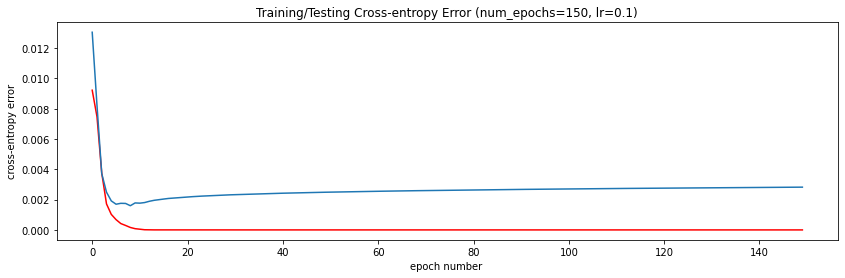

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

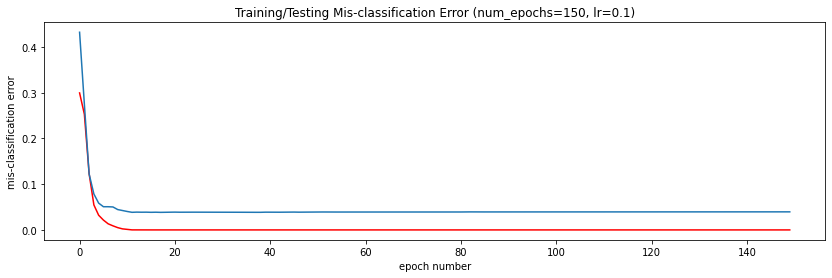

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Fifth time run: try manual_seed = 3450

In [ ]:
torch.manual_seed(3450)
class cnn(torch.nn.Module):
    def __init__(self):
      super(cnn, self).__init__()
      self.conv1 = nn.Sequential(         
        nn.Conv2d(1, 36, 3, 1,1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv2 = nn.Sequential(         
        nn.Conv2d(36, 72, 3, 1,1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv3 = nn.Sequential(         
        nn.Conv2d(72, 144, 3, 1,1),                              
        nn.ReLU(),                      
        nn.Flatten()    
        )
      self.l1 = nn.Linear(144*7*14, 512)
      self.l2 = nn.Linear(512, 19)
    def forward(self, X):
      X = self.conv1(X)
      X = self.conv2(X)
      X = self.conv3(X)       
      X = nn.functional.relu(self.l1(X))
      X = self.l2(X)
      return X
net = cnn()
net.cuda()

cnn(
  (conv1): Sequential(
    (0): Conv2d(1, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(36, 72, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(72, 144, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
  )
  (l1): Linear(in_features=14112, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=19, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_val = []
errors_train = []
errors_val = []
for epoch in range(num_epochs):
    train_error = 0
    val_error = 0
    train_loss_sum = 0
    val_loss_sum = 0
    for i, (train,labels) in enumerate(train_loader):
        # forward passing
        x_train = train.float().reshape(100,1,28,56)
        X_train = x_train.cuda()
        Y_labels = labels.cuda()
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b, (test,labels) in enumerate(val_loader):
            x_test = test.float().reshape(100,1,28,56)
            X_test = x_test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            val_error += (predicted_test != Y_test).sum()
            val_loss = loss_func(output, Y_test)
            val_loss_sum += val_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_val.append(val_loss_sum.item()/batch_size)
    errors_val.append(val_error.item()/batch_size)               

Epoch [1/150], Step[100/60000], Loss: 2.8190
Epoch [1/150], Step[200/60000], Loss: 2.4494
Epoch [2/150], Step[100/60000], Loss: 2.3145
Epoch [2/150], Step[200/60000], Loss: 1.6020
Epoch [3/150], Step[100/60000], Loss: 1.0336
Epoch [3/150], Step[200/60000], Loss: 0.4490
Epoch [4/150], Step[100/60000], Loss: 0.5266
Epoch [4/150], Step[200/60000], Loss: 0.5165
Epoch [5/150], Step[100/60000], Loss: 0.2286
Epoch [5/150], Step[200/60000], Loss: 0.2905
Epoch [6/150], Step[100/60000], Loss: 0.0807
Epoch [6/150], Step[200/60000], Loss: 0.0881
Epoch [7/150], Step[100/60000], Loss: 0.1230
Epoch [7/150], Step[200/60000], Loss: 0.0530
Epoch [8/150], Step[100/60000], Loss: 0.0768
Epoch [8/150], Step[200/60000], Loss: 0.0525
Epoch [9/150], Step[100/60000], Loss: 0.0368
Epoch [9/150], Step[200/60000], Loss: 0.0592
Epoch [10/150], Step[100/60000], Loss: 0.0248
Epoch [10/150], Step[200/60000], Loss: 0.0272
Epoch [11/150], Step[100/60000], Loss: 0.0322
Epoch [11/150], Step[200/60000], Loss: 0.0284
Epoch 

Text(0, 0.5, 'cross-entropy error')

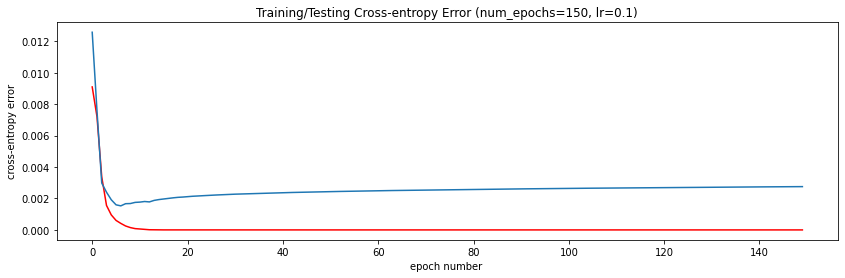

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

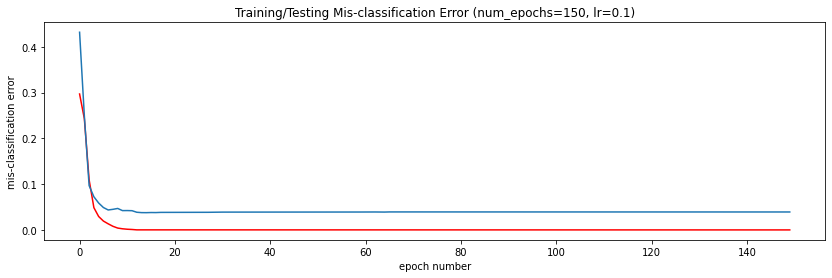

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** In the plot, we can conclude the training error (the blue line) decreases to a sightly larger degree in the first 10 epoch times, and then it decreases more stable after 40 epoch times, and the error decreases to almost 0 after 150-time iterations. <br>
The testing error (the red line) is also declining, and after 150 epochs, all five seeds show the model is overfitting since the test error increases. And the testing error starts from 0.009 which is less than 0.012 of the training error initially, it might due to the model has been trained well after the training error. And the updated model can train the testing set well.<br>
And we can conclude the mic-classification training error decreases to a sightly larger degree in the first 10 epoch times, from 0.4 to 0.1. And then it decreases more stable after 20 epoch times, and the misclassification error decreases to almost 0 after 150-time iterations. <br>
The misclassification testing error is also declining, but compared with cross-entropy error, since the model has been trained well, the testing error at the start point has already not big, which is 0.3, and then it shows the overfit since with time increasing, the error increases.<br>

Here the testing error will reach about 0.01 in the end, which is less than 1.4% of the SVM with
Gaussian Kernel.

(c) Visualize your best results of the learned W as one hundred 28×28 images (plot all filters
as one image, as we have seen in class).

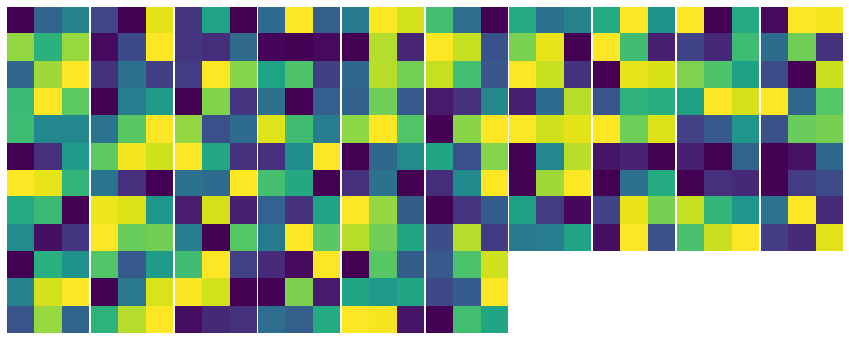

In [ ]:
params = list(net.parameters())[0]
plt.figure(figsize=(15, 15))
for i in range(params.shape[0]):
    plt.subplot(10, 10, i + 1) # Since we know it is a 10 x 10 grid
    x = params[i,:].cpu().data.numpy()
    plt.imshow(x[0,:,:],interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("<filename>.png")

**Answer:** The plot creates a figure with 10 images, one row for each filter and one column for each channel.The dark squares indicate small or inhibitory weights and the light squares represent large or excitatory weights. 

(d) Try different values of the learning rate. You should start with a learning rate of 0.1.
You should then reduce it to .01, and increase it to 0.2 and 0.5. What happens to the
convergence properties of the algorithm (looking at both average cross entropy and %
incorrect)? Try momentum of 0.0, 0.5, 0.9. How does momentum affect convergence
rate? How would you choose the best value of these parameters?

- Try learning rate = 0.1
- Try momentum = 0.5

Text(0, 0.5, 'cross-entropy error')

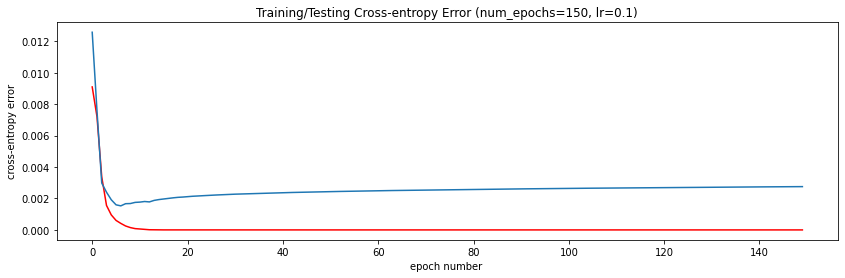

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

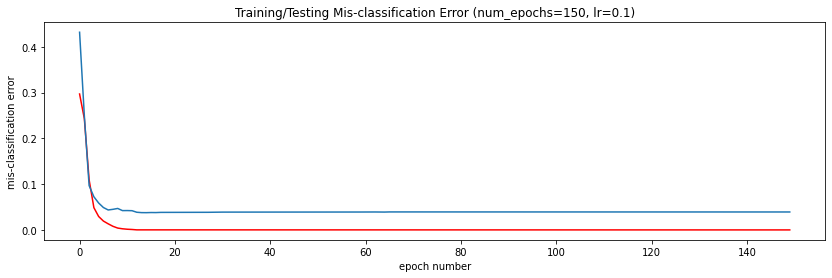

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.1
- Try momentum = 0.9

Text(0, 0.5, 'cross-entropy error')

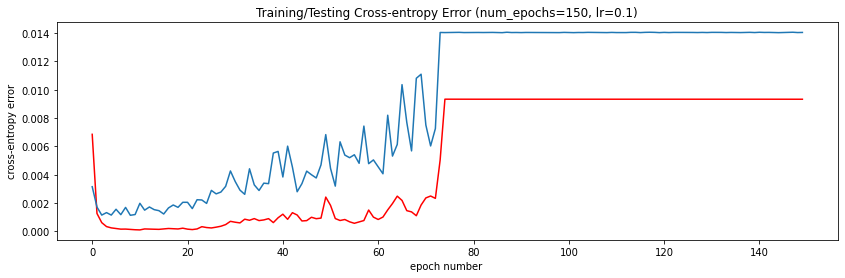

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

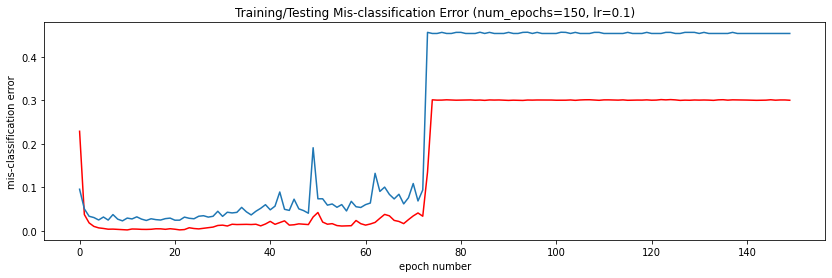

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** here I tried some of combinations of different momentums and learning rates. <br>
- For learning rate, when the learning rate is too small, like 0.01. It is unlikely to show overfitting after 150 epochs times. And if the learning rate is too big, like 0.5. And the training error and testing error are unlikely to converge in the end. Therefore, the learning rate should not be too large or too small, when learning rate = 0.1, it performs well.
- For momentum, when the gradient keeps changing direction, momentum will smooth out the variations. This is particularly useful when the network is not well-conditioned. For most points on the surface, the gradient does not point towards the minimum, and successive steps of gradient descent can oscillate from one side to the other, progressing only very slowly to the minimum. And the addition of momentum helps to speed up convergence to the minimum by damping these oscillations. But when momentum = 0.9, the testing error and training error will have large oscillations. For our case, when momentum = 0.5, it performs well.

##**Model 2: Three layers Conv2d, BatchNorm and Dropout**

- First time run: try manual_seed = 1

- Plot the average training cross-entropy error 
- Plot the classification error (in percentage) vs. number of epochs

In [ ]:
torch.manual_seed(1) 
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(1,32,3,1)
    self.conv1_bn=nn.BatchNorm2d(32)
    
    self.conv2=nn.Conv2d(32,64,3,1)
    self.conv2_bn=nn.BatchNorm2d(64)

    self.conv3=nn.Conv2d(64,128,3,1)
    self.conv3_bn=nn.BatchNorm2d(128)
    
    self.dropout1=nn.Dropout(0.25)
    
    self.fc1=nn.Linear(35200,100)
    self.fc1_bn=nn.BatchNorm1d(100)
    
    self.fc2=nn.Linear(100,64)
    self.fc3=nn.Linear(64,19)
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(self.conv1_bn(x))
    
    x=self.conv2(x)
    x=F.relu(self.conv2_bn(x))

    x=self.conv3(x)
    x=F.relu(self.conv3_bn(x))
    
    x=F.max_pool2d(x,2)
    x=self.dropout1(x)
    
    x=torch.flatten(x,1)
    
    x=self.fc1(x)
    x=F.relu(self.fc1_bn(x))
    
    x=self.fc2(x)
    x=self.fc3(x)
    output=F.log_softmax(x,dim=1)
    return output
net = Net()
net.cuda()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=35200, out_features=100, bias=True)
  (fc1_bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=100, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=19, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_val = []
errors_train = []
errors_val = []
for epoch in range(num_epochs):
    train_error = 0
    val_error = 0
    train_loss_sum = 0
    val_loss_sum = 0
    for i, (train,labels) in enumerate(train_loader):
        # forward passing
        x_train = train.float().reshape(100,1,28,56)
        X_train = x_train.cuda()
        Y_labels = labels.cuda()
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b, (test,labels) in enumerate(val_loader):
            x_test = test.float().reshape(100,1,28,56)
            X_test = x_test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            val_error += (predicted_test != Y_test).sum()
            val_loss = loss_func(output, Y_test)
            val_loss_sum += val_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_val.append(val_loss_sum.item()/batch_size)
    errors_val.append(val_error.item()/batch_size)               

Epoch [1/150], Step[100/60000], Loss: 1.7282
Epoch [1/150], Step[200/60000], Loss: 1.0595
Epoch [2/150], Step[100/60000], Loss: 0.5217
Epoch [2/150], Step[200/60000], Loss: 0.6218
Epoch [3/150], Step[100/60000], Loss: 0.2791
Epoch [3/150], Step[200/60000], Loss: 0.2060
Epoch [4/150], Step[100/60000], Loss: 0.1006
Epoch [4/150], Step[200/60000], Loss: 0.1060
Epoch [5/150], Step[100/60000], Loss: 0.0592
Epoch [5/150], Step[200/60000], Loss: 0.0955
Epoch [6/150], Step[100/60000], Loss: 0.0440
Epoch [6/150], Step[200/60000], Loss: 0.0585
Epoch [7/150], Step[100/60000], Loss: 0.0133
Epoch [7/150], Step[200/60000], Loss: 0.0586
Epoch [8/150], Step[100/60000], Loss: 0.0340
Epoch [8/150], Step[200/60000], Loss: 0.0126
Epoch [9/150], Step[100/60000], Loss: 0.0086
Epoch [9/150], Step[200/60000], Loss: 0.0088
Epoch [10/150], Step[100/60000], Loss: 0.0168
Epoch [10/150], Step[200/60000], Loss: 0.0077
Epoch [11/150], Step[100/60000], Loss: 0.0119
Epoch [11/150], Step[200/60000], Loss: 0.0125
Epoch 

Text(0, 0.5, 'cross-entropy error')

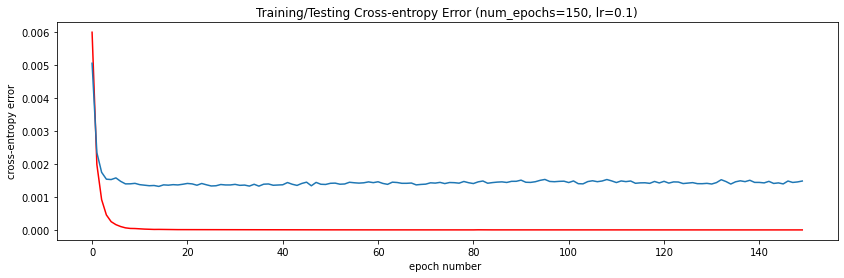

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

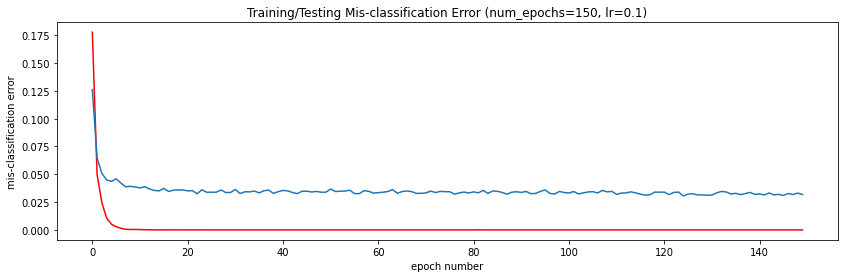

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Second time run: manual seed = 1234

In [ ]:
torch.manual_seed(1234) 
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(1,32,3,1)
    self.conv1_bn=nn.BatchNorm2d(32)
    
    self.conv2=nn.Conv2d(32,64,3,1)
    self.conv2_bn=nn.BatchNorm2d(64)

    self.conv3=nn.Conv2d(64,128,3,1)
    self.conv3_bn=nn.BatchNorm2d(128)
    
    self.dropout1=nn.Dropout(0.25)
    
    self.fc1=nn.Linear(35200,100)
    self.fc1_bn=nn.BatchNorm1d(100)
    
    self.fc2=nn.Linear(100,64)
    self.fc3=nn.Linear(64,19)
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(self.conv1_bn(x))
    
    x=self.conv2(x)
    x=F.relu(self.conv2_bn(x))

    x=self.conv3(x)
    x=F.relu(self.conv3_bn(x))
    
    x=F.max_pool2d(x,2)
    x=self.dropout1(x)
    
    x=torch.flatten(x,1)
    
    x=self.fc1(x)
    x=F.relu(self.fc1_bn(x))
    
    x=self.fc2(x)
    x=self.fc3(x)
    output=F.log_softmax(x,dim=1)
    return output
net = Net()
net.cuda()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=35200, out_features=100, bias=True)
  (fc1_bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=100, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=19, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_val = []
errors_train = []
errors_val = []
for epoch in range(num_epochs):
    train_error = 0
    val_error = 0
    train_loss_sum = 0
    val_loss_sum = 0
    for i, (train,labels) in enumerate(train_loader):
        # forward passing
        x_train = train.float().reshape(100,1,28,56)
        X_train = x_train.cuda()
        Y_labels = labels.cuda()
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b, (test,labels) in enumerate(val_loader):
            x_test = test.float().reshape(100,1,28,56)
            X_test = x_test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            val_error += (predicted_test != Y_test).sum()
            val_loss = loss_func(output, Y_test)
            val_loss_sum += val_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_val.append(val_loss_sum.item()/batch_size)
    errors_val.append(val_error.item()/batch_size)               

Epoch [1/150], Step[100/60000], Loss: 1.6783
Epoch [1/150], Step[200/60000], Loss: 1.1721
Epoch [2/150], Step[100/60000], Loss: 0.4982
Epoch [2/150], Step[200/60000], Loss: 0.5112
Epoch [3/150], Step[100/60000], Loss: 0.1937
Epoch [3/150], Step[200/60000], Loss: 0.2872
Epoch [4/150], Step[100/60000], Loss: 0.2185
Epoch [4/150], Step[200/60000], Loss: 0.1942
Epoch [5/150], Step[100/60000], Loss: 0.0765
Epoch [5/150], Step[200/60000], Loss: 0.0604
Epoch [6/150], Step[100/60000], Loss: 0.0563
Epoch [6/150], Step[200/60000], Loss: 0.0415
Epoch [7/150], Step[100/60000], Loss: 0.0216
Epoch [7/150], Step[200/60000], Loss: 0.0216
Epoch [8/150], Step[100/60000], Loss: 0.0126
Epoch [8/150], Step[200/60000], Loss: 0.0137
Epoch [9/150], Step[100/60000], Loss: 0.0115
Epoch [9/150], Step[200/60000], Loss: 0.0202
Epoch [10/150], Step[100/60000], Loss: 0.0069
Epoch [10/150], Step[200/60000], Loss: 0.0210
Epoch [11/150], Step[100/60000], Loss: 0.0056
Epoch [11/150], Step[200/60000], Loss: 0.0077
Epoch 

Text(0, 0.5, 'cross-entropy error')

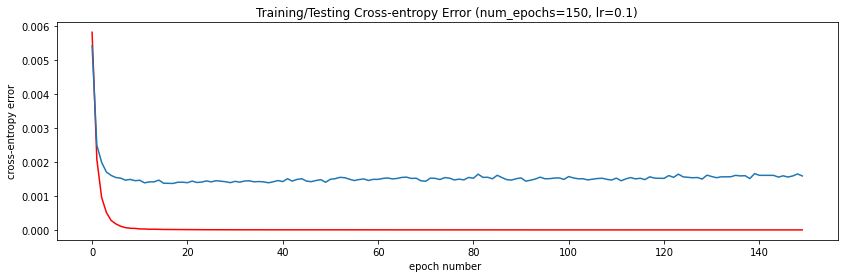

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

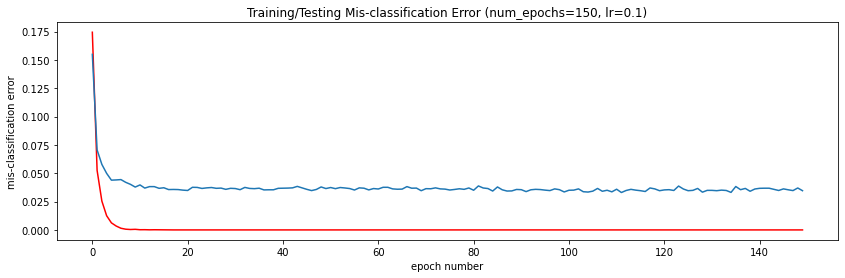

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Third time run: try manual_seed = 2340

In [ ]:
torch.manual_seed(2340) 
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(1,32,3,1)
    self.conv1_bn=nn.BatchNorm2d(32)
    
    self.conv2=nn.Conv2d(32,64,3,1)
    self.conv2_bn=nn.BatchNorm2d(64)

    self.conv3=nn.Conv2d(64,128,3,1)
    self.conv3_bn=nn.BatchNorm2d(128)
    
    self.dropout1=nn.Dropout(0.25)
    
    self.fc1=nn.Linear(35200,100)
    self.fc1_bn=nn.BatchNorm1d(100)
    
    self.fc2=nn.Linear(100,64)
    self.fc3=nn.Linear(64,19)
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(self.conv1_bn(x))
    
    x=self.conv2(x)
    x=F.relu(self.conv2_bn(x))

    x=self.conv3(x)
    x=F.relu(self.conv3_bn(x))
    
    x=F.max_pool2d(x,2)
    x=self.dropout1(x)
    
    x=torch.flatten(x,1)
    
    x=self.fc1(x)
    x=F.relu(self.fc1_bn(x))
    
    x=self.fc2(x)
    x=self.fc3(x)
    output=F.log_softmax(x,dim=1)
    return output
net = Net()
net.cuda()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=35200, out_features=100, bias=True)
  (fc1_bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=100, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=19, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_val = []
errors_train = []
errors_val = []
for epoch in range(num_epochs):
    train_error = 0
    val_error = 0
    train_loss_sum = 0
    val_loss_sum = 0
    for i, (train,labels) in enumerate(train_loader):
        # forward passing
        x_train = train.float().reshape(100,1,28,56)
        X_train = x_train.cuda()
        Y_labels = labels.cuda()
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b, (test,labels) in enumerate(val_loader):
            x_test = test.float().reshape(100,1,28,56)
            X_test = x_test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            val_error += (predicted_test != Y_test).sum()
            val_loss = loss_func(output, Y_test)
            val_loss_sum += val_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_val.append(val_loss_sum.item()/batch_size)
    errors_val.append(val_error.item()/batch_size)               

Epoch [1/150], Step[100/60000], Loss: 1.7959
Epoch [1/150], Step[200/60000], Loss: 0.8911
Epoch [2/150], Step[100/60000], Loss: 0.6053
Epoch [2/150], Step[200/60000], Loss: 0.4041
Epoch [3/150], Step[100/60000], Loss: 0.2235
Epoch [3/150], Step[200/60000], Loss: 0.2152
Epoch [4/150], Step[100/60000], Loss: 0.1155
Epoch [4/150], Step[200/60000], Loss: 0.1519
Epoch [5/150], Step[100/60000], Loss: 0.0787
Epoch [5/150], Step[200/60000], Loss: 0.0996
Epoch [6/150], Step[100/60000], Loss: 0.0450
Epoch [6/150], Step[200/60000], Loss: 0.0383
Epoch [7/150], Step[100/60000], Loss: 0.0357
Epoch [7/150], Step[200/60000], Loss: 0.0326
Epoch [8/150], Step[100/60000], Loss: 0.0379
Epoch [8/150], Step[200/60000], Loss: 0.0140
Epoch [9/150], Step[100/60000], Loss: 0.0058
Epoch [9/150], Step[200/60000], Loss: 0.0083
Epoch [10/150], Step[100/60000], Loss: 0.0088
Epoch [10/150], Step[200/60000], Loss: 0.0198
Epoch [11/150], Step[100/60000], Loss: 0.0044
Epoch [11/150], Step[200/60000], Loss: 0.0066
Epoch 

Text(0, 0.5, 'cross-entropy error')

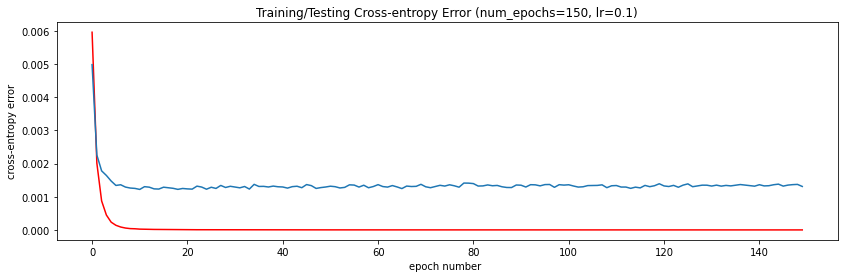

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

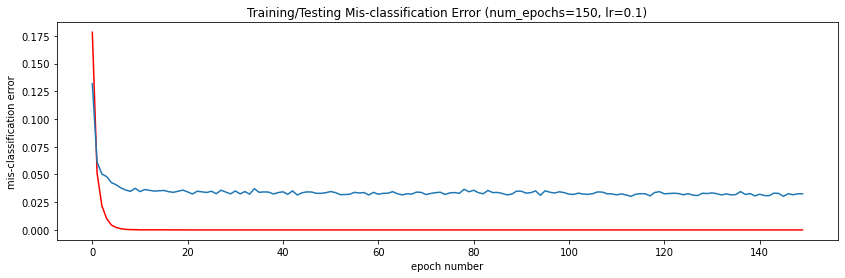

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try fourth time: try manual_seed = 100

In [ ]:
torch.manual_seed(100) 
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(1,32,3,1)
    self.conv1_bn=nn.BatchNorm2d(32)
    
    self.conv2=nn.Conv2d(32,64,3,1)
    self.conv2_bn=nn.BatchNorm2d(64)

    self.conv3=nn.Conv2d(64,128,3,1)
    self.conv3_bn=nn.BatchNorm2d(128)
    
    self.dropout1=nn.Dropout(0.25)
    
    self.fc1=nn.Linear(35200,100)
    self.fc1_bn=nn.BatchNorm1d(100)
    
    self.fc2=nn.Linear(100,64)
    self.fc3=nn.Linear(64,19)
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(self.conv1_bn(x))
    
    x=self.conv2(x)
    x=F.relu(self.conv2_bn(x))

    x=self.conv3(x)
    x=F.relu(self.conv3_bn(x))
    
    x=F.max_pool2d(x,2)
    x=self.dropout1(x)
    
    x=torch.flatten(x,1)
    
    x=self.fc1(x)
    x=F.relu(self.fc1_bn(x))
    
    x=self.fc2(x)
    x=self.fc3(x)
    output=F.log_softmax(x,dim=1)
    return output
net = Net()
net.cuda()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=35200, out_features=100, bias=True)
  (fc1_bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=100, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=19, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_val = []
errors_train = []
errors_val = []
for epoch in range(num_epochs):
    train_error = 0
    val_error = 0
    train_loss_sum = 0
    val_loss_sum = 0
    for i, (train,labels) in enumerate(train_loader):
        # forward passing
        x_train = train.float().reshape(100,1,28,56)
        X_train = x_train.cuda()
        Y_labels = labels.cuda()
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b, (test,labels) in enumerate(val_loader):
            x_test = test.float().reshape(100,1,28,56)
            X_test = x_test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            val_error += (predicted_test != Y_test).sum()
            val_loss = loss_func(output, Y_test)
            val_loss_sum += val_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_val.append(val_loss_sum.item()/batch_size)
    errors_val.append(val_error.item()/batch_size)               

Epoch [1/150], Step[100/60000], Loss: 1.7340
Epoch [1/150], Step[200/60000], Loss: 0.9415
Epoch [2/150], Step[100/60000], Loss: 0.6169
Epoch [2/150], Step[200/60000], Loss: 0.3521
Epoch [3/150], Step[100/60000], Loss: 0.2666
Epoch [3/150], Step[200/60000], Loss: 0.3656
Epoch [4/150], Step[100/60000], Loss: 0.1365
Epoch [4/150], Step[200/60000], Loss: 0.0656
Epoch [5/150], Step[100/60000], Loss: 0.0758
Epoch [5/150], Step[200/60000], Loss: 0.0967
Epoch [6/150], Step[100/60000], Loss: 0.0398
Epoch [6/150], Step[200/60000], Loss: 0.0184
Epoch [7/150], Step[100/60000], Loss: 0.0208
Epoch [7/150], Step[200/60000], Loss: 0.0316
Epoch [8/150], Step[100/60000], Loss: 0.0168
Epoch [8/150], Step[200/60000], Loss: 0.0197
Epoch [9/150], Step[100/60000], Loss: 0.0185
Epoch [9/150], Step[200/60000], Loss: 0.0147
Epoch [10/150], Step[100/60000], Loss: 0.0113
Epoch [10/150], Step[200/60000], Loss: 0.0188
Epoch [11/150], Step[100/60000], Loss: 0.0171
Epoch [11/150], Step[200/60000], Loss: 0.0095
Epoch 

Text(0, 0.5, 'cross-entropy error')

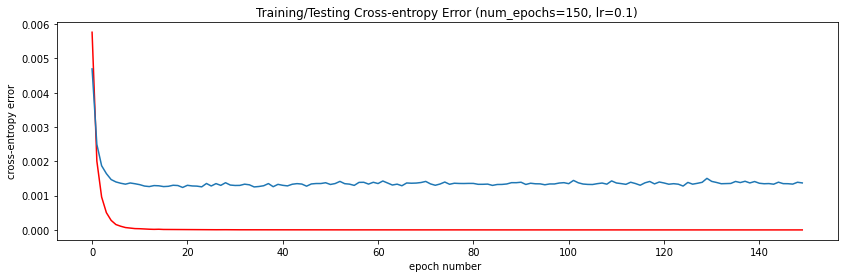

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

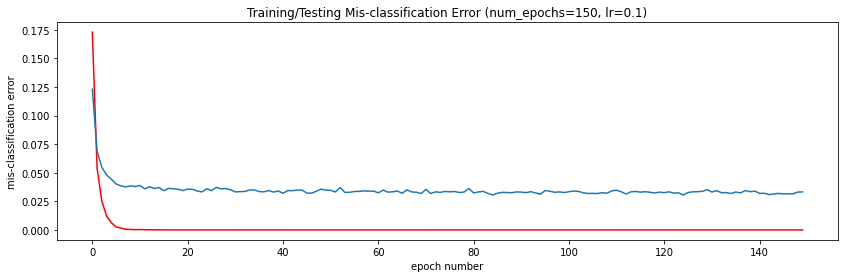

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Fifth time run: try manual_seed = 3450

In [ ]:
torch.manual_seed(3450) 
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(1,32,3,1)
    self.conv1_bn=nn.BatchNorm2d(32)
    
    self.conv2=nn.Conv2d(32,64,3,1)
    self.conv2_bn=nn.BatchNorm2d(64)

    self.conv3=nn.Conv2d(64,128,3,1)
    self.conv3_bn=nn.BatchNorm2d(128)
    
    self.dropout1=nn.Dropout(0.25)
    
    self.fc1=nn.Linear(35200,100)
    self.fc1_bn=nn.BatchNorm1d(100)
    
    self.fc2=nn.Linear(100,64)
    self.fc3=nn.Linear(64,19)
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(self.conv1_bn(x))
    
    x=self.conv2(x)
    x=F.relu(self.conv2_bn(x))

    x=self.conv3(x)
    x=F.relu(self.conv3_bn(x))
    
    x=F.max_pool2d(x,2)
    x=self.dropout1(x)
    
    x=torch.flatten(x,1)
    
    x=self.fc1(x)
    x=F.relu(self.fc1_bn(x))
    
    x=self.fc2(x)
    x=self.fc3(x)
    output=F.log_softmax(x,dim=1)
    return output
net = Net()
net.cuda()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=35200, out_features=100, bias=True)
  (fc1_bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=100, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=19, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_val = []
errors_train = []
errors_val = []
for epoch in range(num_epochs):
    train_error = 0
    val_error = 0
    train_loss_sum = 0
    val_loss_sum = 0
    for i, (train,labels) in enumerate(train_loader):
        # forward passing
        x_train = train.float().reshape(100,1,28,56)
        X_train = x_train.cuda()
        Y_labels = labels.cuda()
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b, (test,labels) in enumerate(val_loader):
            x_test = test.float().reshape(100,1,28,56)
            X_test = x_test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            val_error += (predicted_test != Y_test).sum()
            val_loss = loss_func(output, Y_test)
            val_loss_sum += val_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_val.append(val_loss_sum.item()/batch_size)
    errors_val.append(val_error.item()/batch_size)               

Epoch [1/150], Step[100/60000], Loss: 1.7735
Epoch [1/150], Step[200/60000], Loss: 1.1444
Epoch [2/150], Step[100/60000], Loss: 0.6308
Epoch [2/150], Step[200/60000], Loss: 0.3653
Epoch [3/150], Step[100/60000], Loss: 0.3378
Epoch [3/150], Step[200/60000], Loss: 0.3586
Epoch [4/150], Step[100/60000], Loss: 0.0893
Epoch [4/150], Step[200/60000], Loss: 0.1163
Epoch [5/150], Step[100/60000], Loss: 0.0564
Epoch [5/150], Step[200/60000], Loss: 0.0790
Epoch [6/150], Step[100/60000], Loss: 0.0233
Epoch [6/150], Step[200/60000], Loss: 0.0280
Epoch [7/150], Step[100/60000], Loss: 0.0263
Epoch [7/150], Step[200/60000], Loss: 0.0438
Epoch [8/150], Step[100/60000], Loss: 0.0115
Epoch [8/150], Step[200/60000], Loss: 0.0176
Epoch [9/150], Step[100/60000], Loss: 0.0085
Epoch [9/150], Step[200/60000], Loss: 0.0127
Epoch [10/150], Step[100/60000], Loss: 0.0073
Epoch [10/150], Step[200/60000], Loss: 0.0087
Epoch [11/150], Step[100/60000], Loss: 0.0238
Epoch [11/150], Step[200/60000], Loss: 0.0048
Epoch 

Text(0, 0.5, 'cross-entropy error')

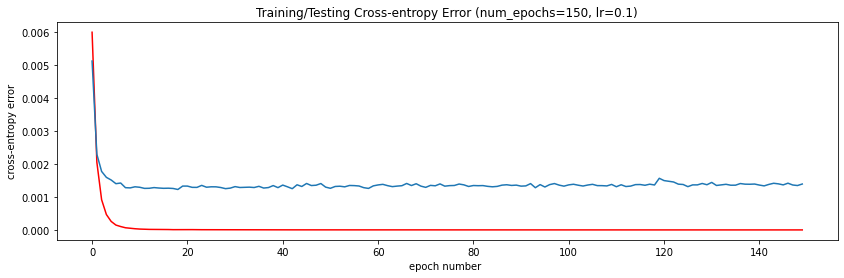

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

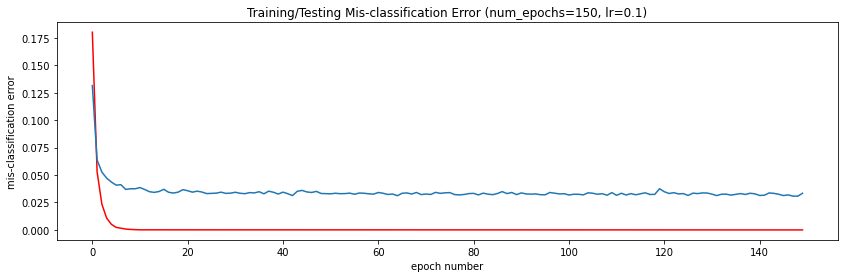

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** In the plot, we can conclude the training error (the blue line) decreases to a sightly larger degree in the first 10 epoch times, and then it decreases more stable after 40 epoch times, and the error decreases to almost 0 after 150-time iterations. <br>
The testing error (the red line) is also declining, and after 150 epochs, all five seeds show the model is overfitting since the test error increases. And the testing error starts from 0.005 which is less than 0.006 of the training error initially, it might due to the model has been trained well after the training error. And the updated model can train the testing set well.<br>
And we can conclude the mic-classification training error decreases to a sightly larger degree in the first 10 epoch times, from 0.175 to almost 0. And then it decreases more stable after 20 epoch times, and the misclassification error decreases to almost 0 after 150-time iterations. <br>
The misclassification testing error is also declining, but compared with cross-entropy error, since the model has been trained well, the testing error at the start point has already not big, which is 0.125, and then it shows the overfit since with time increasing, the error increases.<br>

(c) Visualize your best results of the learned W as one hundred 28×28 images (plot all filters
as one image, as we have seen in class). Do the learned features exhibit any structure?

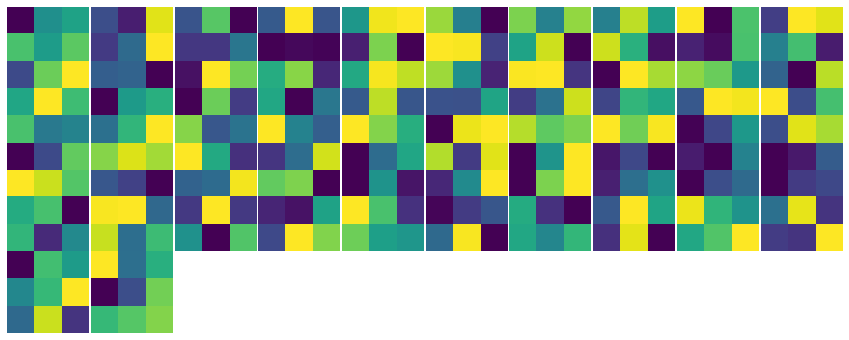

In [ ]:
params = list(net.parameters())[0]
plt.figure(figsize=(15, 15))
for i in range(params.shape[0]):
    plt.subplot(10, 10, i + 1) # Since we know it is a 10 x 10 grid
    x = params[i,:].cpu().data.numpy()
    plt.imshow(x[0,:,:],interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("<filename>.png")

(d) Try different values of the learning rate. You should start with a learning rate of 0.1.
You should then reduce it to .01, and increase it to 0.2 and 0.5. What happens to the
convergence properties of the algorithm (looking at both average cross entropy and %
incorrect)? Try momentum of 0.0, 0.5, 0.9. How does momentum affect convergence
rate? How would you choose the best value of these parameters?

- Try learning rate = 0.1
- Try momentum = 0.5

Text(0, 0.5, 'cross-entropy error')

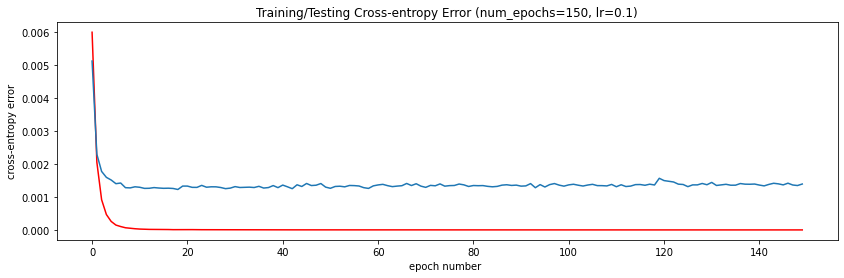

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

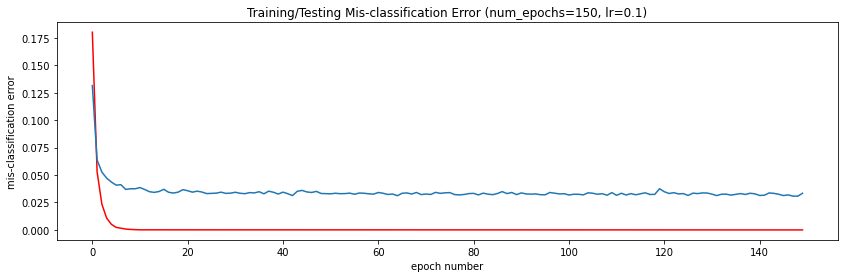

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = .1
- Try momentum = .9

Text(0, 0.5, 'cross-entropy error')

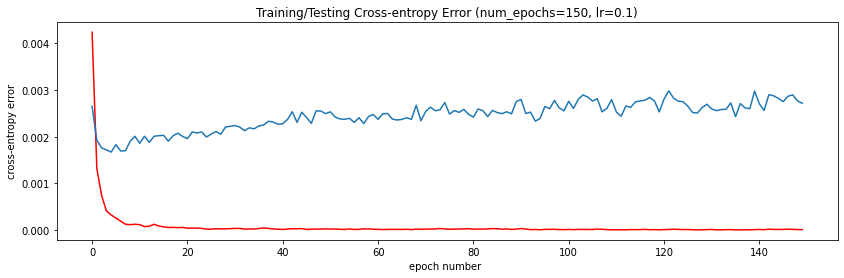

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

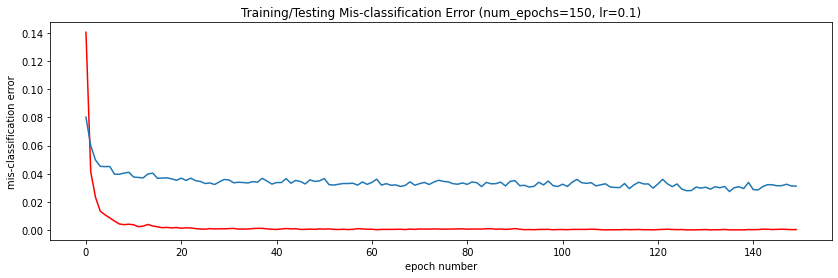

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = .01
- Try momentum = 0

Text(0, 0.5, 'cross-entropy error')

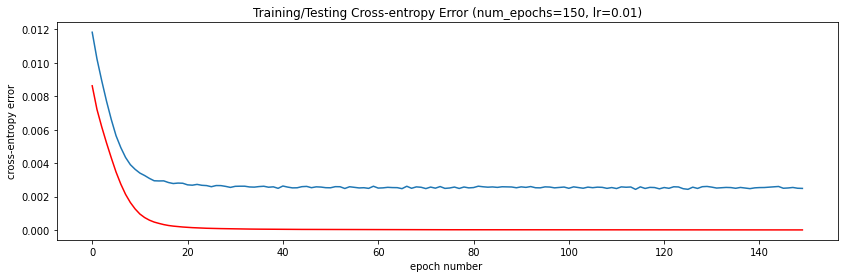

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

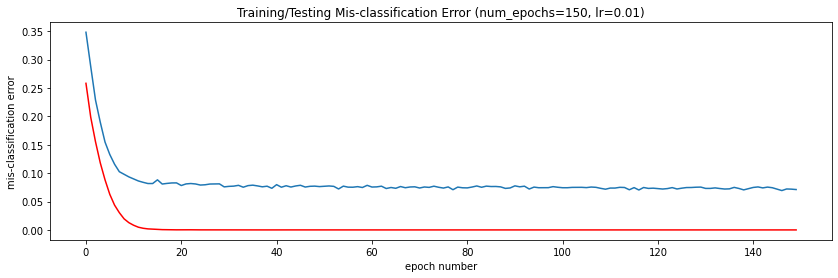

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.01
- Try momentum = 0.9

Text(0, 0.5, 'cross-entropy error')

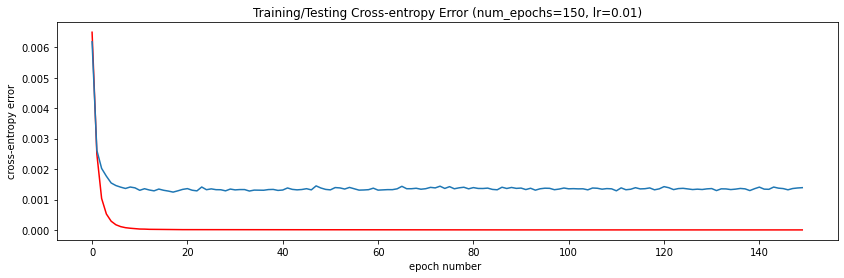

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

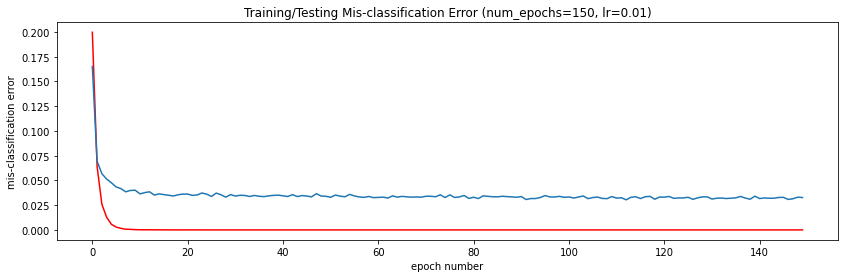

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.5
- Try momentum = 0

Text(0, 0.5, 'cross-entropy error')

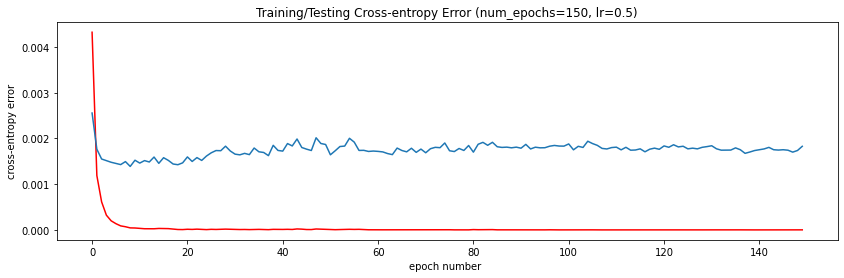

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

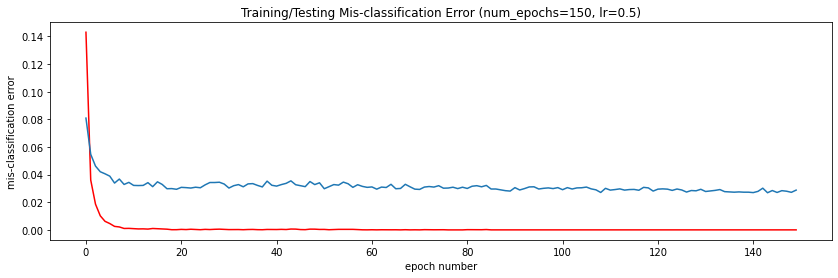

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

- Try learning rate = 0.5
- Try momentum = 0.9

Text(0, 0.5, 'cross-entropy error')

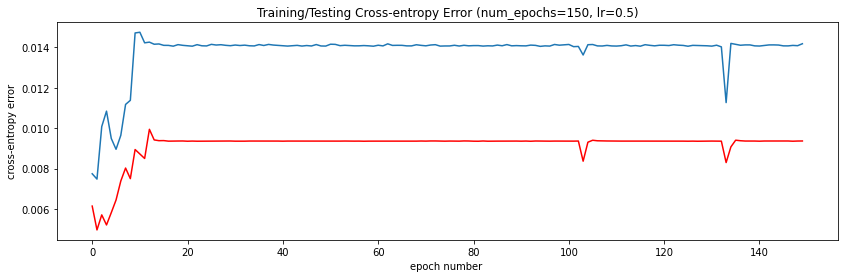

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_val],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

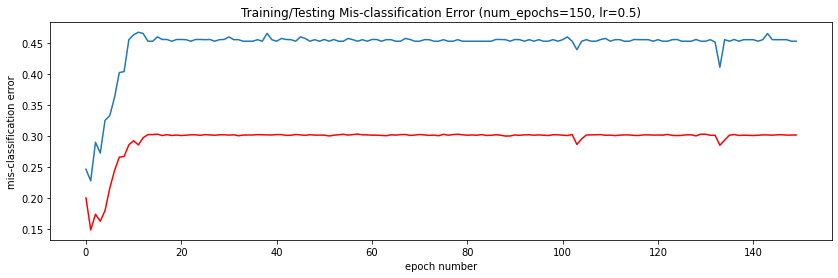

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_val],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** here I tried some of combinations of different momentums and learning rates. <br>
- For learning rate, when the learning rate is too small, like 0.01. It is unlikely to show overfitting after 150 epochs times. And if the learning rate is too big, like 0.5. And the training error and testing error are unlikely to converge in the end. Therefore, the learning rate should not be too large or too small, when learning rate = 0.1, it performs well.
- For momentum, when the gradient keeps changing direction, momentum will smooth out the variations. This is particularly useful when the network is not well-conditioned. For most points on the surface, the gradient does not point towards the minimum, and successive steps of gradient descent can oscillate from one side to the other, progressing only very slowly to the minimum. And the addition of momentum helps to speed up convergence to the minimum by damping these oscillations. But when momentum = 0.9, the testing error and training error will have large oscillations. For our case, when momentum = 0.5, it performs well.

(b) Using the validation error (i.e., the performance on val.txt) to select the best model.

**Conclusion:** 
The first model's validation error can reach 0.05 if we choose the suitable paramters. And the second model's validation error can reach 0.025 if we choose the suitbale paramters. <br>
Therefore, we choose **Model 2: Three layers Conv2d, BatchNorm and Dropout**.

(c) Report the generalization error (i.e., the performance on test.txt) for the model you
picked. How would you compare the test errors you obtained with respect to the original
MNIST data? Explain why you cannot obtain a test error lower than 1%.

In [ ]:
learning_rate = .1
momentum = 0

In [ ]:
torch.manual_seed(3450) 
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(1,32,3,1)
    self.conv1_bn=nn.BatchNorm2d(32)
    
    self.conv2=nn.Conv2d(32,64,3,1)
    self.conv2_bn=nn.BatchNorm2d(64)

    self.conv3=nn.Conv2d(64,128,3,1)
    self.conv3_bn=nn.BatchNorm2d(128)
    
    self.dropout1=nn.Dropout(0.25)
    
    self.fc1=nn.Linear(35200,100)
    self.fc1_bn=nn.BatchNorm1d(100)
    
    self.fc2=nn.Linear(100,64)
    self.fc3=nn.Linear(64,19)
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(self.conv1_bn(x))
    
    x=self.conv2(x)
    x=F.relu(self.conv2_bn(x))

    x=self.conv3(x)
    x=F.relu(self.conv3_bn(x))
    
    x=F.max_pool2d(x,2)
    x=self.dropout1(x)
    
    x=torch.flatten(x,1)
    
    x=self.fc1(x)
    x=F.relu(self.fc1_bn(x))
    
    x=self.fc2(x)
    x=self.fc3(x)
    output=F.log_softmax(x,dim=1)
    return output
net = Net()
net.cuda()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=35200, out_features=100, bias=True)
  (fc1_bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=100, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=19, bias=True)
)

In [ ]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
n_total_steps = len(train_data)
losses_train = []
losses_test = []
errors_train = []
errors_test = []
for epoch in range(num_epochs):
    train_error = 0
    test_error = 0
    train_loss_sum = 0
    test_loss_sum = 0
    for i, (train,labels) in enumerate(train_loader):
        # forward passing
        x_train = train.float().reshape(100,1,28,56)
        X_train = x_train.cuda()
        Y_labels = labels.cuda()
        out = net(X_train)
        predicted_train = torch.max(out.data,1)[1].cuda().data 
        batch_error = (predicted_train != Y_labels).sum()
        train_error += batch_error
        train_loss = loss_func(out, Y_labels) 
        train_loss_sum += train_loss
        optimizer.zero_grad()
        train_loss.backward()   
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {train_loss.item():.4f}')
    losses_train.append(train_loss_sum.item()/batch_size)
    errors_train.append(train_error.item()/batch_size)
    
    with torch.no_grad():
        for b, (test,labels) in enumerate(test_loader):
            x_test = test.float().reshape(100,1,28,56)
            X_test = x_test.cuda()
            Y_test = labels.cuda()
            output = net(X_test)
            predicted_test = torch.max(output.data,1)[1].cuda().data  
            test_error += (predicted_test != Y_test).sum()
            test_loss = loss_func(output, Y_test)
            test_loss_sum += test_loss
            # correct += pred.eq(target.data.view_as(pred)).sum()
    # test_loss /= len(test_loader.dataset)
    losses_test.append(test_loss_sum.item()/batch_size)
    errors_test.append(test_error.item()/batch_size)               

Epoch [1/150], Step[100/60000], Loss: 1.7735
Epoch [1/150], Step[200/60000], Loss: 1.1444
Epoch [2/150], Step[100/60000], Loss: 0.6308
Epoch [2/150], Step[200/60000], Loss: 0.3653
Epoch [3/150], Step[100/60000], Loss: 0.3378
Epoch [3/150], Step[200/60000], Loss: 0.3586
Epoch [4/150], Step[100/60000], Loss: 0.0893
Epoch [4/150], Step[200/60000], Loss: 0.1163
Epoch [5/150], Step[100/60000], Loss: 0.0564
Epoch [5/150], Step[200/60000], Loss: 0.0790
Epoch [6/150], Step[100/60000], Loss: 0.0233
Epoch [6/150], Step[200/60000], Loss: 0.0280
Epoch [7/150], Step[100/60000], Loss: 0.0263
Epoch [7/150], Step[200/60000], Loss: 0.0438
Epoch [8/150], Step[100/60000], Loss: 0.0115
Epoch [8/150], Step[200/60000], Loss: 0.0176
Epoch [9/150], Step[100/60000], Loss: 0.0085
Epoch [9/150], Step[200/60000], Loss: 0.0127
Epoch [10/150], Step[100/60000], Loss: 0.0073
Epoch [10/150], Step[200/60000], Loss: 0.0087
Epoch [11/150], Step[100/60000], Loss: 0.0238
Epoch [11/150], Step[200/60000], Loss: 0.0048
Epoch 

Text(0, 0.5, 'cross-entropy error')

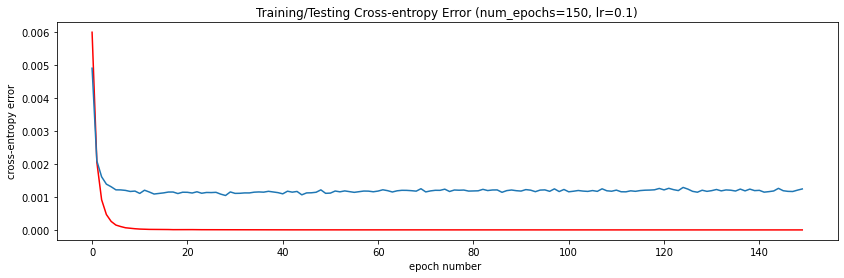

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Cross-entropy Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in losses_train], label="Train",color='r')
plt.plot([t/100 for t in losses_test],label="Test")
plt.xlabel('epoch number ')
plt.ylabel('cross-entropy error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

Text(0, 0.5, 'mis-classification error')

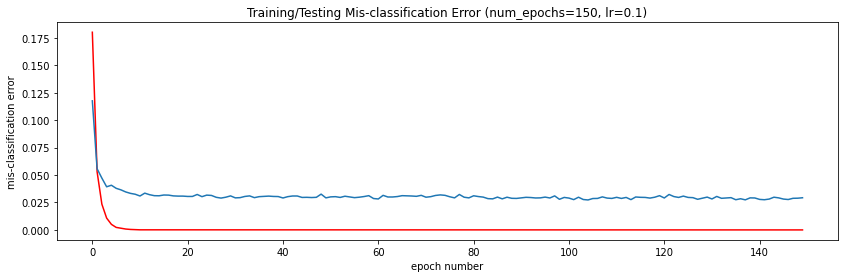

In [ ]:
plt.figure(figsize=(14, 4))
plt.title("Training/Testing Mis-classification Error (num_epochs={}, lr={})".format(num_epochs, learning_rate))
plt.plot([t/600 for t in errors_train], label="Train",color='r')
plt.plot([t/100 for t in errors_test],label="Test")
plt.xlabel('epoch number')
plt.ylabel('mis-classification error')
# plt.plot([mean(losses_train[i:i+10]) for i in range(len(losses_train))])

**Answer:** the test error will achieve 0.025 in the end, and it is sightly larger than 1%. <br>
In my point of view, I think it might due to the complex dataaset compared with the MNIST original dataset. Since the original MNIST dataset only have 10 digits and each of them are quite different each other. But for this dataset with real-valued numbers and the first digit, the data are more complex and the model.<br>
And it also might that we have not so much samples as the original MNIST dataset. This dataset has 20000 training samples and the original MNIST dataset has 60000 training samples. <br>
It also due to the model, we might need a more accurate model with more layers to train our dataset.